In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import astropy.units as u
import starry
from scipy import integrate
from astropy.io import fits
import pickle


starry.config.lazy = False
starry.config.quiet = True


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


KeyboardInterrupt: 

In [ ]:
#Write txt file data into a numpy array, ignoring the first row
basalt = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-rock-basalt-solid-ASTER.txt', skiprows=26)
granite = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-rock-granite-solid-alkalic-ASTER.txt', skiprows=26)
sand = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-soil-sand-brown_loamy_fine-ASTER.txt', skiprows=26)
grass = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-vegetation-grass-lawn-ASTER.txt', skiprows=26)
trees = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-vegetation-trees-deciduous-ASTER.txt', skiprows=26)
cloud = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-water-cloud-MODIS.txt', skiprows=26)
coast = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-water-coast-USGS+ASTER.txt', skiprows=26)
snow = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-water-fine_snow-ASTER.txt', skiprows=26)
sea = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-water-seawater-USGS+ASTER.txt', skiprows=26)

bacterial_mat = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/splib07a_Bacterial_mat_YNP-B1_AVIRISb_RTGC/Bacterial_mat_spec.txt', skiprows=1)
bac_mat_wav = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/splib07a_Bacterial_mat_YNP-B1_AVIRISb_RTGC/Bacterial_mat_wav.txt', skiprows=1)

bacterial_mat = np.column_stack((bac_mat_wav, bacterial_mat))



In [ ]:
for i in range(len(bacterial_mat[:,1])):
    if bacterial_mat[i, 1] < 0:
        bacterial_mat[i, 1] = sea[i, 1]

In [ ]:
basalt[:, 1] = basalt[:, 1] / 100.
granite[:, 1] = granite[:, 1] / 100.
sand[:, 1] = sand[:, 1] / 100.
grass[:, 1] = grass[:, 1] / 100.
trees[:, 1] = trees[:, 1] / 100.
snow[:, 1] = snow[:, 1] / 100.

basalt = np.flip(basalt, axis=0)
granite = np.flip(granite, axis = 0)
sand = np.flip(sand, axis =0)


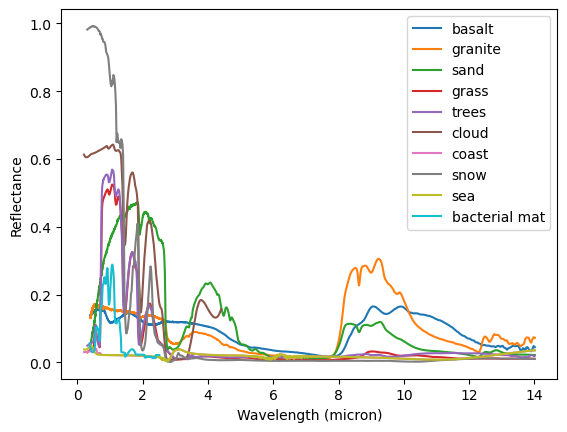

In [ ]:
plt.plot(basalt[:,0], basalt[:,1], label='basalt')
plt.plot(granite[:,0], granite[:,1], label='granite')
plt.plot(sand[:,0], sand[:,1], label='sand')
plt.plot(grass[:,0], grass[:,1], label='grass')
plt.plot(trees[:,0], trees[:,1], label='trees')
plt.plot(cloud[:,0], cloud[:,1], label='cloud')
plt.plot(coast[:,0], coast[:,1], label='coast')
plt.plot(snow[:,0], snow[:,1], label='snow')
plt.plot(sea[:,0], sea[:,1], label='sea')
plt.plot(bacterial_mat[:,0], bacterial_mat[:,1], label='bacterial mat')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Reflectance')
plt.legend()
plt.show()

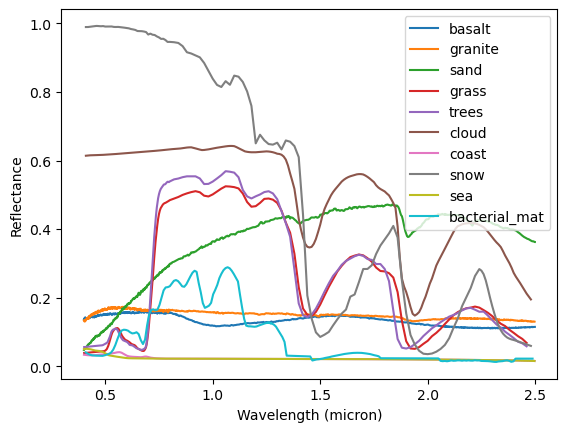

In [ ]:
#Create a dictionary of the spectra
spectra = {'basalt': basalt, 'granite': granite, 'sand': sand, 'grass': grass, 'trees': trees, 'cloud': cloud, 'coast': coast, 'snow': snow, 'sea': sea, 'bacterial_mat': bacterial_mat}

for key in spectra:
    i = np.where(spectra[key][:,0] > 0.4)
    j = np.where(spectra[key][:,0] < 2.5)
    spectra[key] = spectra[key][np.min(i):np.max(j),:]
    plt.plot(spectra[key][:,0], spectra[key][:,1], label=key)

plt.xlabel('Wavelength (micron)')
plt.ylabel('Reflectance')
plt.legend(loc = 'upper right')
plt.show()

[0.4        0.42121212 0.44242424 0.46363636 0.48484848 0.50606061
 0.52727273 0.54848485 0.56969697 0.59090909 0.61212121 0.63333333
 0.65454545 0.67575758 0.6969697  0.71818182 0.73939394 0.76060606
 0.78181818 0.8030303  0.82424242 0.84545455 0.86666667 0.88787879
 0.90909091 0.93030303 0.95151515 0.97272727 0.99393939 1.01515152
 1.03636364 1.05757576 1.07878788 1.1        1.12121212 1.14242424
 1.16363636 1.18484848 1.20606061 1.22727273 1.24848485 1.26969697
 1.29090909 1.31212121 1.33333333 1.35454545 1.37575758 1.3969697
 1.41818182 1.43939394 1.46060606 1.48181818 1.5030303  1.52424242
 1.54545455 1.56666667 1.58787879 1.60909091 1.63030303 1.65151515
 1.67272727 1.69393939 1.71515152 1.73636364 1.75757576 1.77878788
 1.8        1.82121212 1.84242424 1.86363636 1.88484848 1.90606061
 1.92727273 1.94848485 1.96969697 1.99090909 2.01212121 2.03333333
 2.05454545 2.07575758 2.0969697  2.11818182 2.13939394 2.16060606
 2.18181818 2.2030303  2.22424242 2.24545455 2.26666667 2.28787

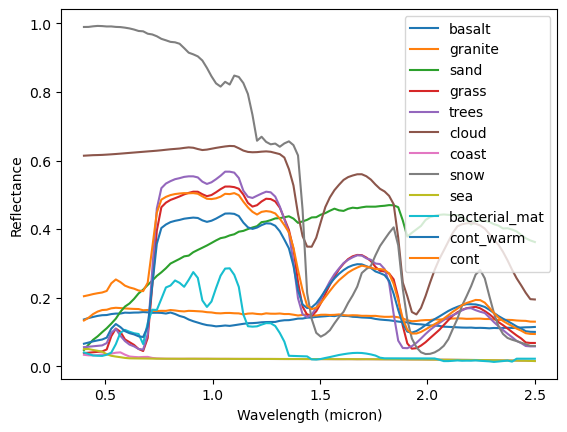

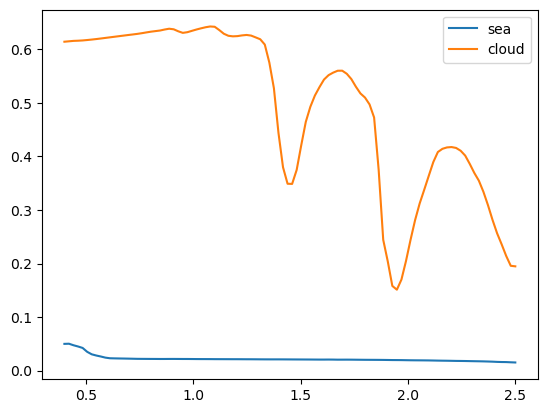

In [ ]:
wav = np.linspace(0.4, 2.5, 100)
print(wav)

for key in spectra:
    resamp = np.interp(wav, spectra[key][:,0], spectra[key][:,1])
    spectra[key] = np.column_stack((wav, resamp))
    plt.plot(spectra[key][:,0], spectra[key][:,1], label=key)

plt.xlabel('Wavelength (micron)')
plt.ylabel('Reflectance')
plt.legend()   
plt.show()

plt.plot(spectra['sea'][:,0], spectra['sea'][:,1], label='sea')
plt.plot(spectra['cloud'][:,0], spectra['cloud'][:,1], label='cloud')
plt.legend()
plt.show()

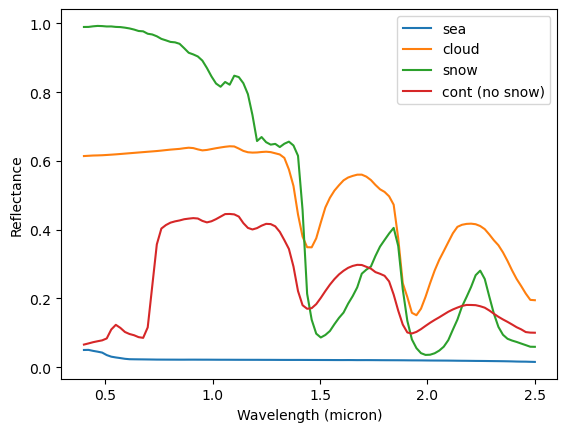

In [ ]:
cont =  (0.3 * spectra['grass'][:,1] + 
        0.3 * spectra['trees'][:,1] +
        0.09 * spectra['granite'][:,1] + 
        0.09 * spectra['basalt'][:,1] +
        0.07 * spectra['sand'][:,1] +
        0.15 * spectra['snow'][:,1])

cont_warm =  (0.3 * spectra['grass'][:,1] + 
        0.3 * spectra['trees'][:,1] +
        0.09 * spectra['granite'][:,1] + 
        0.09 * spectra['basalt'][:,1] +
        0.07 * spectra['sand'][:,1])/0.85

spectra['cont_warm'] = np.column_stack((wav, cont_warm))
spectra['cont'] = np.column_stack((wav, cont))

# plt.plot(spectra['cont'][:,0], spectra['cont'][:,1], label='cont')
plt.plot(spectra['sea'][:,0], spectra['sea'][:,1], label='sea')
plt.plot(spectra['cloud'][:,0], spectra['cloud'][:,1], label='cloud')
plt.plot(spectra['snow'][:,0], spectra['snow'][:,1], label='snow')
plt.plot(spectra['cont_warm'][:,0], spectra['cont_warm'][:,1], label='cont (no snow)')
# plt.plot(spectra['bacterial_mat'][:,0], spectra['bacterial_mat'][:,1], label='bacterial mat')
# plt.plot(spectra['coast'][:,0], spectra['coast'][:,1], label='coast')
# plt.plot(spectra['grass'][:,0], spectra['grass'][:,1], label='grass')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Reflectance')
plt.legend()
plt.show()

In [ ]:
print(np.unravel_index(spectra['cont'][:,1].argmax(), spectra['cont'][:,1].shape))

(24,)


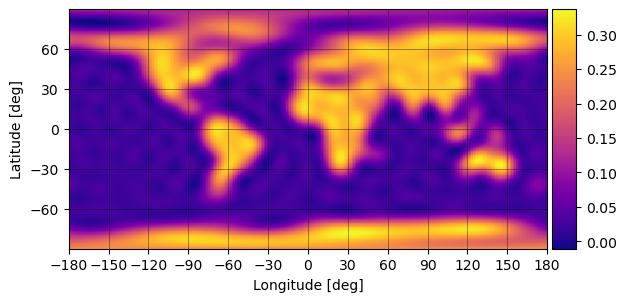

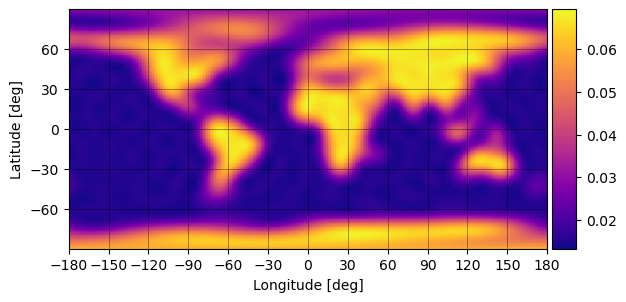

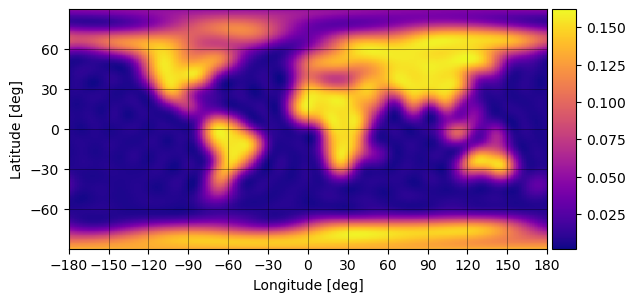

NameError: name 'Y2P' is not defined

In [ ]:
### New mapping method using pixel space+smoothing to reduce ringing, 18 Jan
ydeg = 20
map = starry.Map(ydeg = ydeg, reflected=True)
image0 = np.flipud(plt.imread('/Users/andrew/Documents/starry/starry/img/earth.png'))
# image = ('/Users/andrew/Documents/starry/starry/img/earth.png')
map.load(image0)
map.show(colorbar=True, projection='rect', illuminate = False)
map.reset()

image = image0.copy()
image[image < 0.5] = spectra['sea'][2, 1]
image[image >= 0.5] = spectra['cont'][2, 1]
map.load(image, smoothing = 0.08)
map.show(colorbar=True, projection='rect', illuminate = False)
# lat, lon, Y2P, P2Y, Dx, Dy = map.get_pixel_transforms()

# p = Y2P.dot(map.y)

map.reset()
image = image0.copy()
image[image < 0.5] = spectra['sea'][28, 1]
image[image >= 0.5] = spectra['cont'][28, 1]
map.load(image, smoothing = 0.08)
map.show(colorbar=True, projection='rect', illuminate = False)

print(Y2P.shape)

fig, ax = plt.subplots(1, figsize=(12, 5))
im = ax.scatter(lon, lat, s=300, c=p, alpha=0.5, ec="none", cmap="plasma")
plt.colorbar(im)
ax.set_xlim(-190, 190)
ax.set_ylim(-90, 90)
ax.set_xlabel("Longitude [deg]")
ax.set_ylabel("Latitude [deg]")

print(np.max(p), np.min(p))


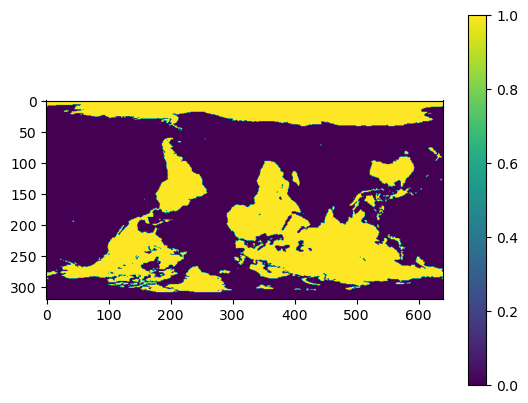

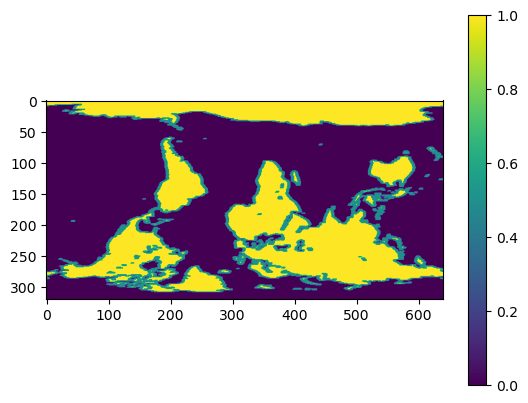

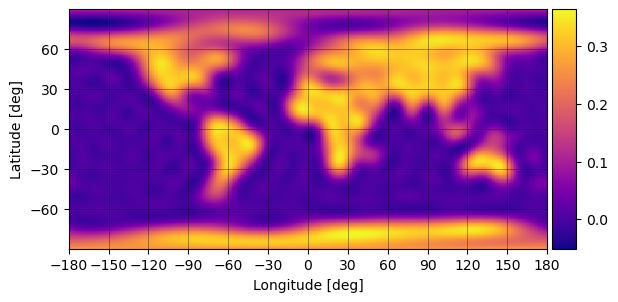

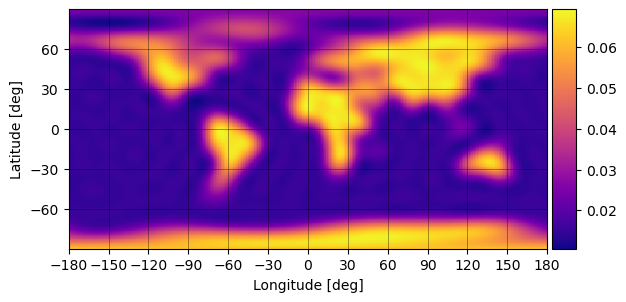

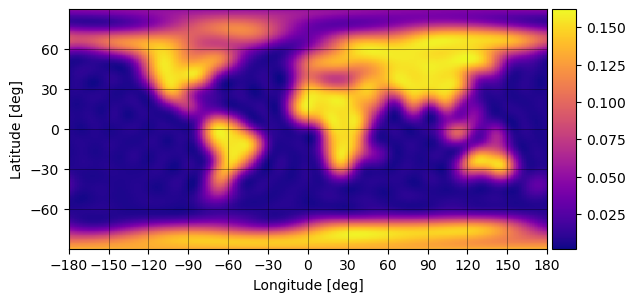

0.810989245322772 0.1250580265113015


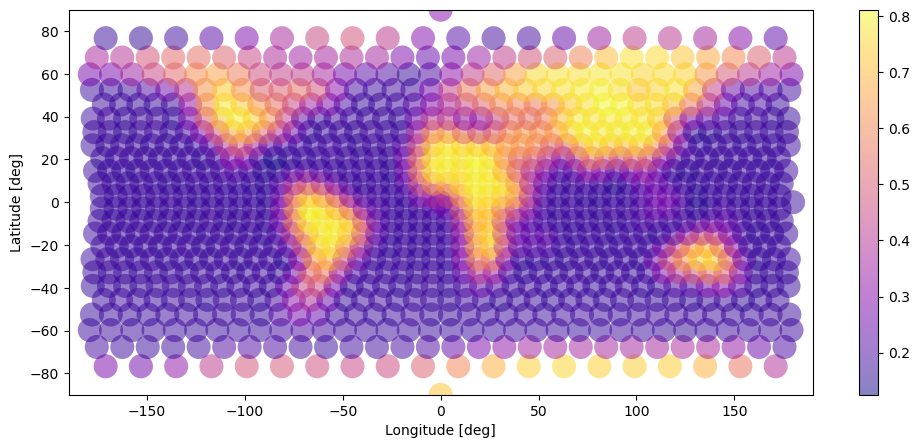

In [ ]:
### 15 Apr - Adopting above to incorporate convolution to define coasts

ydeg = 20
map = starry.Map(ydeg = ydeg, reflected=True)
image0 = np.flipud(plt.imread('/Users/andrew/Documents/starry/starry/img/earth.png'))
image1 = image0.copy()
image1[image1 < 0.5] = 0.
image1[image1 >= 0.5] = 1.
plt.imshow(image1)
plt.colorbar()
plt.show()

coast_ij = np.zeros((image1.shape[0], image1.shape[1]))
for row in range(len(image1[:,0]) - 1):
    for col in range(len(image1[0]) - 1):
        if image1[row, col] != image1[row, col+1]:
            coast_ij[row, col] = 1.
        if image1[row, col] != image1[row + 1, col]:
            coast_ij[row, col] = 0.8


for row in range(len(coast_ij[:,0])):
    for col in range(len(coast_ij[0])):
        if coast_ij[row, col] == 1.:
            image1[row, col] = 0.5
            if col < len(coast_ij[0]) - 2:
                image1[row, col+1] = 0.5
                image1[row, col+2] = 0.5
            if col > 1:
                image1[row, col-1] = 0.5
                image1[row, col-2] = 0.5
        if coast_ij[row, col] == 0.8:
            image1[row, col] = 0.5
            if row < len(coast_ij[:,0]) - 2:
                image1[row+1, col] = 0.5
                image1[row+2, col] = 0.5
            if row > 1:
                image1[row-1, col] = 0.5
                image1[row-2, col] = 0.5

plt.imshow(image1)
plt.colorbar()
plt.show()

map.load(image1)
map.show(colorbar=True, projection='rect', illuminate = False)
map.reset()

image = image1.copy()
image[image == 0.] = spectra['sea'][2, 1]
image[image == 1.] = spectra['cont'][2, 1]
image[image == 0.5] = spectra['coast'][2, 1]
map.load(image, smoothing = 0.08)
map.show(colorbar=True, projection='rect', illuminate = False)
lat, lon, Y2P, P2Y, Dx, Dy = map.get_pixel_transforms()

p = Y2P.dot(map.y)

map.reset()
image = image0.copy()
image[image < 0.5] = spectra['sea'][28, 1]
image[image >= 0.5] = spectra['cont'][28, 1]
map.load(image, smoothing = 0.08)
map.show(colorbar=True, projection='rect', illuminate = False)


fig, ax = plt.subplots(1, figsize=(12, 5))
im = ax.scatter(lon, lat, s=300, c=p, alpha=0.5, ec="none", cmap="plasma")
plt.colorbar(im)
ax.set_xlim(-190, 190)
ax.set_ylim(-90, 90)
ax.set_xlabel("Longitude [deg]")
ax.set_ylabel("Latitude [deg]")

print(np.max(p), np.min(p))

In [ ]:
print(image.shape)
print(p.shape)
print(map.y.shape)
print(lat.shape)
print(lon.shape)
print(image)

(320, 640)
(996,)
(441,)
(996,)
(996,)
[[0.50497174 0.50497174 0.50497174 ... 0.50497174 0.50497174 0.50497174]
 [0.50497174 0.50497174 0.50497174 ... 0.50497174 0.50497174 0.50497174]
 [0.50497174 0.50497174 0.50497174 ... 0.50497174 0.50497174 0.50497174]
 ...
 [0.02184517 0.02184517 0.02184517 ... 0.02184517 0.02184517 0.02184517]
 [0.02184517 0.02184517 0.02184517 ... 0.02184517 0.02184517 0.02184517]
 [0.02184517 0.02184517 0.02184517 ... 0.02184517 0.02184517 0.02184517]]


In [ ]:
def add_clouds(map, spec, min_size = 30, max_size = 140, num = 6):

    cloud_pix = np.zeros((num, 3))

    for i in range(num):
        size = np.random.uniform(min_size, max_size)
        
        lon = np.random.uniform(0, 640)
        lat = np.random.uniform(0, 320)

        r_pix = int(size / 640. * 360)

        for x, y in np.ndindex(map.shape):
            if (x - lat)**2 + (y - lon)**2 < r_pix**2:
                map[x, y] = spec

        cloud_pix[i] = (lat, lon, r_pix)
    
    cum_coverage = (1. - np.count_nonzero(map - spec) / (320. * 640.)) * 100.

    print("{} percent cloud coverage".format(cum_coverage))
    plt.imshow(map)
    plt.colorbar()
    plt.show()

    return map, cum_coverage
    #return cloud_pix

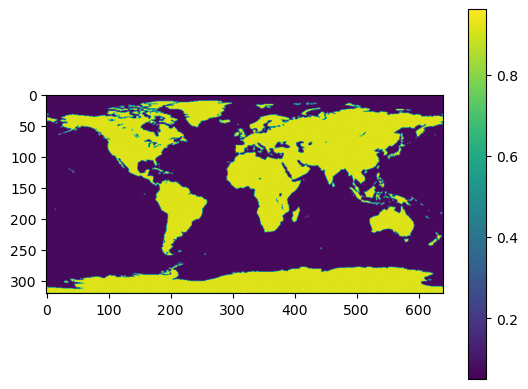

31.277343749999996 percent cloud coverage


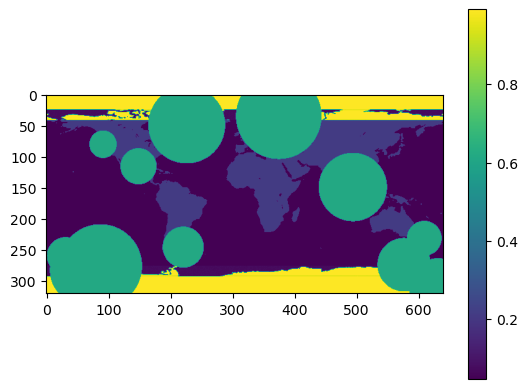

/Users/andrew/opt/anaconda3/envs/starry_dev/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:709: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

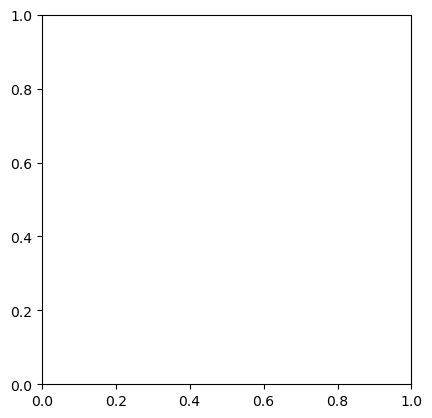

In [ ]:
image = plt.imread('/Users/andrew/Documents/starry/starry/img/earth.png')
plt.imshow(image)
plt.colorbar()
plt.show()

image[0:25][:] = spectra['snow'][2, 1]
image[293:320][:] = spectra['snow'][2, 1]
image[26:41][image[26:41] >= 0.5] = spectra['snow'][2, 1]
image[277:292][image[277:292] >= 0.5] = spectra['snow'][2, 1]
image[42:276][image[42:276] < 0.5] = spectra['sea'][2, 1]
image[42:276][image[42:276] >= 0.5] = spectra['cont'][2, 1]

image, _ = add_clouds(image, spectra['cloud'][2, 1], num = 12)

plt.imshow(image)
plt.colorbar()
plt.show()

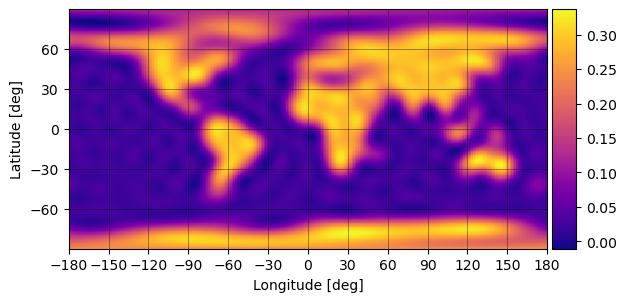

In [ ]:
#### Working Method for Continent/Ocean ###

earth_refl_spec = np.ones((len(wav), 320, 640))
ydeg = 20
specmap_y = np.zeros((len(wav), (ydeg+1)**2))
specmap_y_shift = np.zeros((len(wav), (ydeg+1)**2))
specmap_p = np.zeros((len(wav), 996))
minpix = np.zeros((len(wav)))
maxpix = np.zeros((len(wav)))
amps = np.zeros((len(wav)))

map = starry.Map(ydeg = ydeg, reflected=True)
image0 = np.flipud(plt.imread('/Users/andrew/Documents/starry/starry/img/earth.png'))
map.load(image0)
map.show(colorbar=True, projection='rect', illuminate = False)

for wl in range(len(wav)):
    
    map.reset()
    image = image0.copy()

    image[image < 0.5] = spectra['sea'][wl, 1]
    image[image >= 0.5] = spectra['cont'][wl, 1]
    earth_refl_spec[wl] = image

    map.load(image, smoothing = 0.1)
    specmap_y[wl] = map.y

    _, _, Y2P, P2Y, _, _ = map.get_pixel_transforms()
    p = Y2P.dot(map.y)

    #Pixel stretch to match max/min albedo to max/min pixel value
    p = p / np.max(p) * (spectra['cont'][wl, 1] - spectra['sea'][wl, 1]) + np.min(p)

    #Pixel shift to set min val 
    
    #shift = np.min(p) - 0.1         # shift the pixel values so that the minimum is 0.1
    shift = np.min(p) - spectra['sea'][wl, 1]         # shift the pixel values so that the minimum is ocean reflectance
    p = p - shift

    specmap_p[wl] = p

    y = P2Y.dot(p)

    specmap_y_shift[wl] = y

    minpix[wl] = np.min(p)
    maxpix[wl] = np.max(p)  
    
    amps[wl] = y[0]

# for wl in range(len(wav)):
#     image = plt.imread('/Users/andrew/Documents/starry/starry/img/earth.png')
#     image[image < 0.5] = spectra['sea'][wl, 1]
#     image[image >= 0.5] = spectra['cont'][wl, 1]
#     earth_refl_spec[wl] = image
#     map = starry.Map(ydeg=ydeg, reflected=True)
#     map_p = starry.Map(ydeg=ydeg, reflected=True)
#     map.load(np.flipud(earth_refl_spec[wl]))
#     map_p.load(np.flipud(earth_refl_spec[wl]), force_psd=True)
#     specmap_y[wl] = map.y
#     specmap_ypsd[wl] = map_p.y
#     maps = maps + (map,)
#     maps_psd = maps_psd + (map_p,)


41.04589843749999 percent cloud coverage


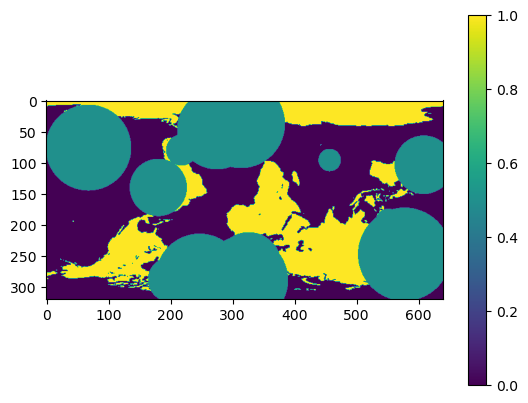

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


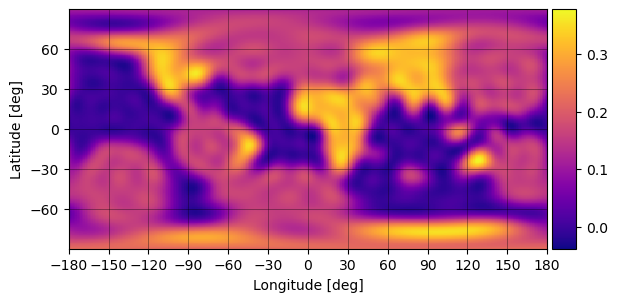

In [ ]:
#### Adapting Working Method for Cont/Ocean to include ice and clouds ###

earth_refl_spec = np.ones((len(wav), 320, 640))
ydeg = 20
specmap_y = np.zeros((len(wav), (ydeg+1)**2))
specmap_y_shift = np.zeros((len(wav), (ydeg+1)**2))
specmap_p = np.zeros((len(wav), 996))
minpix = np.zeros((len(wav)))
maxpix = np.zeros((len(wav)))
amps = np.zeros((len(wav)))

map = starry.Map(ydeg = ydeg, reflected=True)
scalarmap = starry.Map(ydeg = ydeg, reflected=True)
image0 = np.flipud(plt.imread('/Users/andrew/Documents/starry/starry/img/earth.png'))
image0[image0 < 0.5] = 0.
image0[image0 >= 0.5] = 1.

image0, _ = add_clouds(image0, 0.5, num = 15)
print(image0)
map.load(image0)
map.show(colorbar=True, projection='rect', illuminate = False)


0.8666666666666667


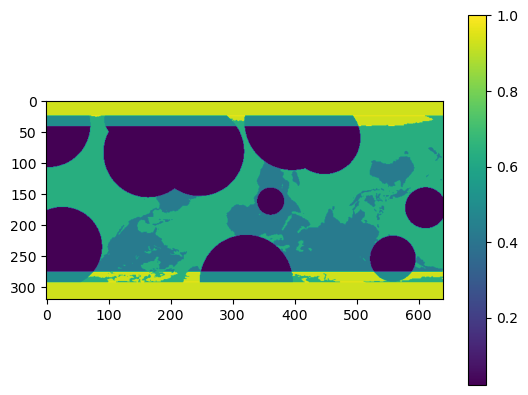

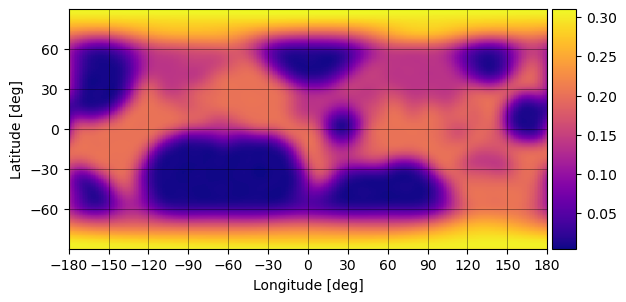

In [ ]:
###Run on May 1

for wl in range(len(wav)):
    
    map.reset()
    image = image0.copy()

    image[0:25] = spectra['snow'][wl, 1]
    image[293:320] = spectra['snow'][wl, 1]
    image[26:41][image[26:41] == 1.] = spectra['snow'][wl, 1]
    image[277:292][image[277:292] == 1.] = spectra['snow'][wl, 1]
    image[42:276][image[42:276] == 0.5] = spectra['sea'][wl, 1]
    image[42:276][image[42:276] == 1.] = spectra['cont_warm'][wl, 1]
    image[image == 0] = spectra['cloud'][wl, 1]
    
    # for i in range(len(cloud_pix)):
    #     lat = cloud_pix[i, 0]
    #     lon = cloud_pix[i, 1]
    #     r_pix = cloud_pix[i, 2]
    #     for x, y in np.ndindex(image.shape):
    #         if (x - lat)**2 + (y - lon)**2 < r_pix**2:
    #             image[x, y] = spectra['cloud'][wl, 1]

    earth_refl_spec[wl] = image

    map.load(image, smoothing = 0.1)
    specmap_y[wl] = map.y

    _, _, Y2P, P2Y, _, _ = map.get_pixel_transforms()
    p = Y2P.dot(map.y)

    #Pixel stretch to match max/min albedo to max/min pixel value
    maxi = np.max((spectra['cont_warm'][wl, 1], spectra['cloud'][wl, 1], spectra['snow'][wl, 1], spectra['sea'][wl, 1]))
    mini = np.min((spectra['cont_warm'][wl, 1], spectra['cloud'][wl, 1], spectra['snow'][wl, 1], spectra['sea'][wl, 1]))

    p = p / np.max(p) * (maxi - mini) + np.min(p)

    #Pixel shift to set min val 
    
    #shift = np.min(p) - 0.1         # shift the pixel values so that the minimum is 0.1
    shift = np.min(p) - mini      # shift the pixel values so that the minimum is ocean reflectance
    p = p - shift

    specmap_p[wl] = p

    y = P2Y.dot(p)

    specmap_y_shift[wl] = y

    minpix[wl] = np.min(p)
    maxpix[wl] = np.max(p)  
    
    #Times 0.5 added on 27/2 to try to reduce overall spherical albedo to more realistic values
    amps[wl] = y[0] * 0.5

    if wl == 22:
        print(wav[wl])
        plt.imshow(image)
        plt.colorbar()
        plt.show()
        scalarmap.load(image, smoothing = 0.1)
        scalarmap.show(colorbar=True, projection='rect', illuminate = False)

In [1]:
###May 1 - now with continental continuum
trees_nopig_wav, trees_nopig_wet, trees_nopig_dry = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/apocrita/reflection_proj/spectra/trees_cont.txt', unpack=True)
trees_nopig_spec = np.interp(wav, trees_nopig_wav, trees_nopig_wet/100.)

spectra['trees_nopig'] = np.column_stack((wav, trees_nopig_spec))

cont_nopig =  (0.6 * spectra['cont_nopig'][:, 1] +
        0.09 * spectra['granite'][:,1] + 
        0.09 * spectra['basalt'][:,1] +
        0.07 * spectra['sand'][:,1])/0.85

spectra['cont_nopig'] = np.column_stack((wav, cont_nopig))

plt.plot(wav, cont_nopig, label='Continent with no pigments')
plt.plot(wav, spectra['cont_warm'][:,1], label='Continent with Trees and Grass')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Reflectance')
plt.legend()
plt.show()

plt.plot(wav, spectra['trees'][:,1], label='Trees')
plt.plot(wav, spectra['trees_no_pig'][:,1], label='Trees - no pigments')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Reflectance')
plt.legend()
plt.show()


NameError: name 'np' is not defined

0.8666666666666667


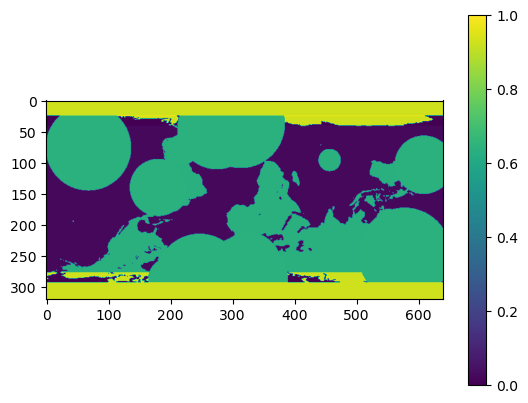

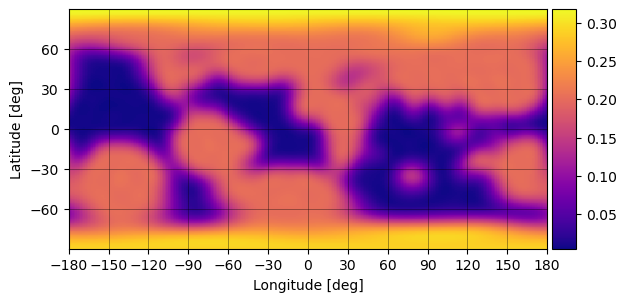

In [175]:
###Run on May 1 for trees with continuum

for wl in range(len(wav)):
    
    map.reset()
    image = image0.copy()

    image[:25] = spectra['snow'][wl, 1]
    image[293:] = spectra['snow'][wl, 1]
    image[26:41][image[26:41] == 1.] = spectra['snow'][wl, 1]
    image[277:293][image[277:293] == 1.] = spectra['snow'][wl, 1]
    image[41:277][image[41:277] == 0] = spectra['sea'][wl, 1]
    image[41:277][image[41:277] == 1.] = spectra['cont_nopig'][wl, 1]
    image[image == 0.5] = spectra['cloud'][wl, 1]
    
    # for i in range(len(cloud_pix)):
    #     lat = cloud_pix[i, 0]
    #     lon = cloud_pix[i, 1]
    #     r_pix = cloud_pix[i, 2]
    #     for x, y in np.ndindex(image.shape):
    #         if (x - lat)**2 + (y - lon)**2 < r_pix**2:
    #             image[x, y] = spectra['cloud'][wl, 1]

    earth_refl_spec[wl] = image

    map.load(image, smoothing = 0.1)
    specmap_y[wl] = map.y

    _, _, Y2P, P2Y, _, _ = map.get_pixel_transforms()
    p = Y2P.dot(map.y)

    #Pixel stretch to match max/min albedo to max/min pixel value
    maxi = np.max((spectra['cont_nopig'][wl, 1], spectra['cloud'][wl, 1], spectra['snow'][wl, 1], spectra['sea'][wl, 1]))
    mini = np.min((spectra['cont_nopig'][wl, 1], spectra['cloud'][wl, 1], spectra['snow'][wl, 1], spectra['sea'][wl, 1]))

    p = p / np.max(p) * (maxi - mini) + np.min(p)

    #Pixel shift to set min val 
    
    #shift = np.min(p) - 0.1         # shift the pixel values so that the minimum is 0.1
    shift = np.min(p) - mini      # shift the pixel values so that the minimum is ocean reflectance
    p = p - shift

    specmap_p[wl] = p

    y = P2Y.dot(p)

    specmap_y_shift[wl] = y

    minpix[wl] = np.min(p)
    maxpix[wl] = np.max(p)  
    
    #Times 0.5 added on 27/2 to try to reduce overall spherical albedo to more realistic values
    amps[wl] = y[0] * 0.5

    if wl == 22:
        print(wav[wl])
        plt.imshow(image)
        plt.colorbar()
        plt.show()
        scalarmap.load(image, smoothing = 0.1)
        scalarmap.show(colorbar=True, projection='rect', illuminate = False)

dict_keys(['PNSB', 'PSB', 'Cyano', 'Other'])


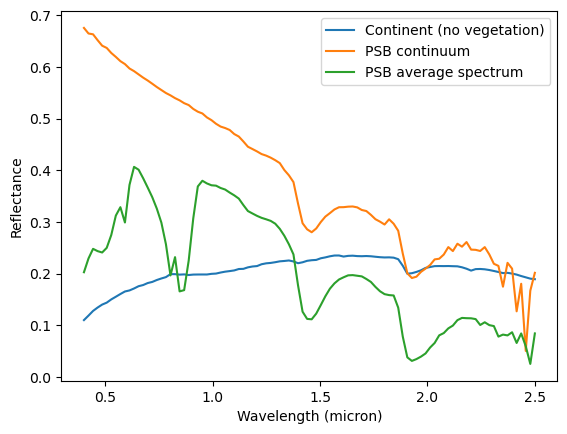

In [151]:
###May 1 - now with purple bacteria
purple_file = open('/Users/andrew/Desktop/QMUL/PhD/photosynth/Thermal_Antenna_model-main/purple_bacteria_spectra.pkl', 'rb')
purple_spectra = pickle.load(purple_file)
purple_file.close()

print(purple_spectra.keys())

avg_psb_spec = np.zeros((len(wav)))

for key in purple_spectra['PSB']['wet']:
    if key != 'Contwet':
        spec = np.interp(wav, purple_spectra['PSB']['wet'][key]['wav']/1000., purple_spectra['PSB']['wet'][key]['spec'])
        avg_psb_spec += spec

avg_psb_spec = avg_psb_spec / (len(purple_spectra['PSB']['wet']) - 1)


cont_noveg =  (0.09 * spectra['granite'][:,1] + 
        0.09 * spectra['basalt'][:,1] +
        0.07 * spectra['sand'][:,1])/0.25

spectra['cont_noveg'] =  np.column_stack((wav, cont_noveg))
spectra['PSB_avg'] = np.column_stack((wav, avg_psb_spec))

PSB_continuum = np.interp(wav, purple_spectra['PSB']['wet']['Contwet']['wav']/1000., purple_spectra['PSB']['wet']['Contwet']['spec'])
spectra['PSB_cont'] = np.column_stack((wav, PSB_continuum))
                                      
plt.plot(wav, cont_noveg, label='Continent (no vegetation)')
plt.plot(wav, PSB_continuum, label='PSB continuum')
plt.plot(wav, avg_psb_spec, label='PSB average spectrum')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Reflectance')
plt.legend()
plt.show()

In [141]:
def define_coast(map, spec, size):
    coast_pix = 0

    coast_ij = np.zeros((map.shape[0], map.shape[1]))

    for row in range(len(map[:,0]) - 1):
        for col in range(len(map[0]) - 1):
            if map[row, col] != map[row, col+1]:
                coast_ij[row, col] = 1.
            if map[row, col] != map[row + 1, col]:
                coast_ij[row, col] = 0.8


    for row in range(len(coast_ij[:,0])):
        for col in range(len(coast_ij[0])):

            if coast_ij[row, col] == 1.:
                map[row, col] = spec
                for i in range(size):
                    if col + i < len(coast_ij[0]):
                        map[row, col+i] = spec
                        coast_pix += 1
                    if col - i > 0:
                        map[row, col-i] = spec
                        coast_pix += 1

            if coast_ij[row, col] == 0.8:
                map[row, col] = spec
                for i in range(size):
                    if row + i < len(coast_ij[:,0]):
                        map[row+i, col] = spec
                        coast_pix += 1
                    if row - i > 0:
                        map[row-i, col] = spec
                        coast_pix += 1

    percent_coast = (coast_pix / (320. * 640.)) * 100.
    print("This map is {} percent coast".format(percent_coast))
    
    return map, percent_coast

This map is 62.08447265625 percent coast


22.205078125 percent cloud coverage


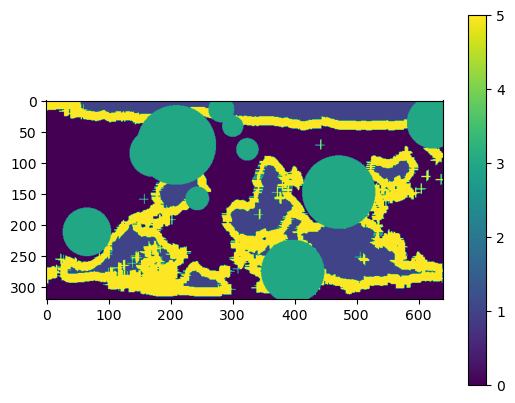

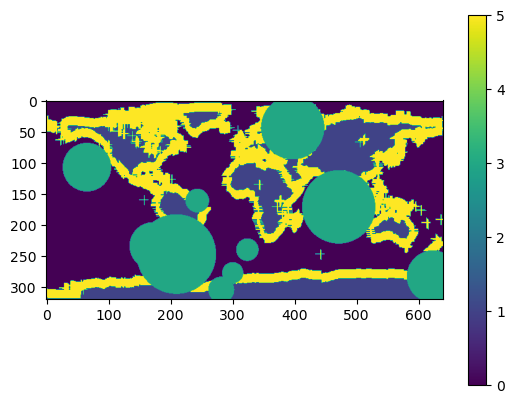

In [183]:
#### Apr 16: Adapting Working Method for Cont/Ocean/ice/clouds to include coast ###
#### Adjusted May 2 to correct coast model, add purple bac ###

earth_refl_spec = np.ones((len(wav), 320, 640))
ydeg = 20
specmap_y = np.zeros((len(wav), (ydeg+1)**2))
specmap_y_shift = np.zeros((len(wav), (ydeg+1)**2))
specmap_p = np.zeros((len(wav), 996))
minpix = np.zeros((len(wav)))
maxpix = np.zeros((len(wav)))
amps = np.zeros((len(wav)))

map = starry.Map(ydeg = ydeg, reflected=True)
scalarmap = starry.Map(ydeg = ydeg, reflected=True)

image0 = np.flipud(plt.imread('/Users/andrew/Documents/starry/starry/img/earth.png'))
image0[image0 < 0.5] = 0.
image0[image0 >= 0.5] = 1.

image0, _ = define_coast(image0, 5, size = 8)

image0, _ = add_clouds(image0, 3, num = 10)

plt.imshow(np.flipud(image0))
plt.colorbar()
plt.show()


0.5434498


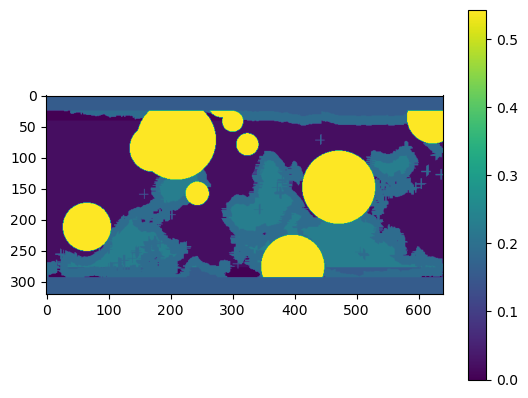

In [187]:
#### May 2 - to use same cloud/cost model with PSB continuum ###
for wl in range(len(wav)):
    
    map.reset()
    image = image0.copy()

    image[:25] = spectra['snow'][wl, 1]
    image[293:] = spectra['snow'][wl, 1]
    image[25:41][image[25:41] == 1.] = spectra['snow'][wl, 1]
    image[277:293][image[277:293] == 1.] = spectra['snow'][wl, 1]
    image[41:277][image[41:277] == 0.] = spectra['sea'][wl, 1]
    image[41:277][image[41:277] == 1.] = spectra['cont_noveg'][wl, 1]
    image[image == 5] = spectra['PSB_avg'][wl, 1]
    image[image == 3] = spectra['cloud'][wl, 1]
    
    # for i in range(len(cloud_pix)):
    #     lat = cloud_pix[i, 0]
    #     lon = cloud_pix[i, 1]
    #     r_pix = cloud_pix[i, 2]
    #     for x, y in np.ndindex(image.shape):
    #         if (x - lat)**2 + (y - lon)**2 < r_pix**2:
    #             image[x, y] = spectra['cloud'][wl, 1]

    earth_refl_spec[wl] = image

    map.load(image, smoothing = 0.1)
    specmap_y[wl] = map.y

    _, _, Y2P, P2Y, _, _ = map.get_pixel_transforms()
    p = Y2P.dot(map.y)

    #Pixel stretch to match max/min albedo to max/min pixel value
    maxi = np.max((spectra['cont_noveg'][wl, 1], spectra['cloud'][wl, 1], spectra['snow'][wl, 1], spectra['sea'][wl, 1], spectra['PSB_avg'][wl, 1]))
    mini = np.min((spectra['cont_noveg'][wl, 1], spectra['cloud'][wl, 1], spectra['snow'][wl, 1], spectra['sea'][wl, 1], spectra['PSB_avg'][wl, 1]))

    p = p / np.max(p) * (maxi - mini) + np.min(p)

    #Pixel shift to set min val 
    
    #shift = np.min(p) - 0.1         # shift the pixel values so that the minimum is 0.1
    shift = np.min(p) - mini      # shift the pixel values so that the minimum is ocean reflectance
    p = p - shift

    specmap_p[wl] = p

    y = P2Y.dot(p)

    specmap_y_shift[wl] = y

    minpix[wl] = np.min(p)
    maxpix[wl] = np.max(p)  
    
    #Times 0.5 added on 27/2 to try to reduce overall spherical albedo to more realistic values
    amps[wl] = y[0] * 0.5

    if wl == 57:
        print(np.max(image))
        plt.imshow(image)
        plt.colorbar()
        plt.show()
        scalarmap.load(image, smoothing = 0.1)

    

dict_keys(['wav', 'dry', 'wet', 'cont_dry', 'cont_wet'])


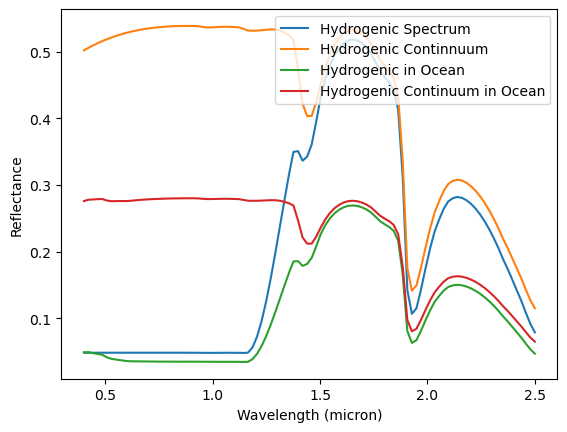

In [160]:
###May 2 - now with hydrogenic bacteria
hydrogenic_file = open('/Users/andrew/Desktop/QMUL/PhD/apocrita/reflection_proj/spectra/hydrogenic.pkl', 'rb')
hydrogenic_spectra = pickle.load(hydrogenic_file)
hydrogenic_file.close()

print(hydrogenic_spectra.keys())

spectra['hyd_wet'] = np.column_stack((wav, np.interp(wav, hydrogenic_spectra['wav']/1000., hydrogenic_spectra['wet'])))
spectra['hyd_dry'] = np.column_stack((wav, np.interp(wav, hydrogenic_spectra['wav']/1000., hydrogenic_spectra['dry'])))
spectra['hyd_cont_wet'] = np.column_stack((wav, np.interp(wav, hydrogenic_spectra['wav']/1000., hydrogenic_spectra['cont_wet'])))
spectra['hyd_cont_dry'] = np.column_stack((wav, np.interp(wav, hydrogenic_spectra['wav']/1000., hydrogenic_spectra['cont_dry'])))


spectra['hyd_ocean'] = np.column_stack((wav, np.mean([spectra['hyd_wet'][:,1], spectra['sea'][:,1]], axis = 0)))
spectra['hyd_cont_ocean'] = np.column_stack((wav, np.mean([spectra['hyd_cont_wet'][:,1], spectra['sea'][:,1]], axis = 0)))
                                      
plt.plot(wav, spectra['hyd_wet'][:, 1], label='Hydrogenic Spectrum')
plt.plot(wav, spectra['hyd_cont_wet'][:, 1], label='Hydrogenic Continnuum')
plt.plot(wav, spectra['hyd_ocean'][:, 1], label='Hydrogenic in Ocean')
plt.plot(wav, spectra['hyd_cont_ocean'][:, 1], label='Hydrogenic Continuum in Ocean')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Reflectance')
plt.legend()
plt.show()

This map is 15.5361328125 percent coast
32.0546875 percent cloud coverage


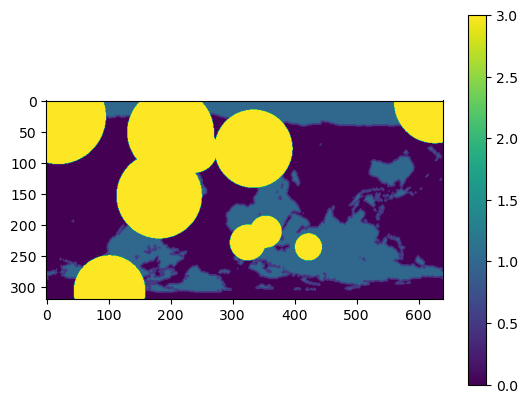

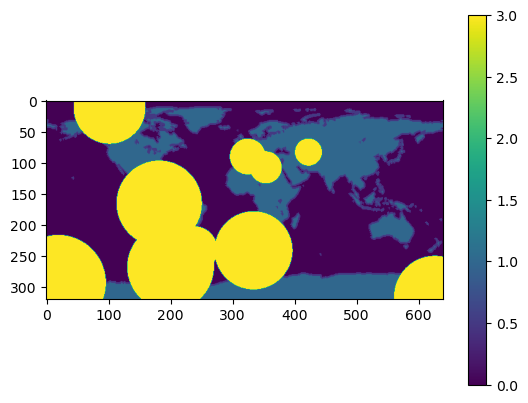

In [161]:
### Run on May 2 with Hydrogenic Organisms in the Ocean! ###

earth_refl_spec = np.ones((len(wav), 320, 640))
ydeg = 20
specmap_y = np.zeros((len(wav), (ydeg+1)**2))
specmap_y_shift = np.zeros((len(wav), (ydeg+1)**2))
specmap_p = np.zeros((len(wav), 996))
minpix = np.zeros((len(wav)))
maxpix = np.zeros((len(wav)))
amps = np.zeros((len(wav)))

map = starry.Map(ydeg = ydeg, reflected=True)
scalarmap = starry.Map(ydeg = ydeg, reflected=True)

image0 = np.flipud(plt.imread('/Users/andrew/Documents/starry/starry/img/earth.png'))
image0[image0 < 0.5] = 0.
image0[image0 >= 0.5] = 1.

image0, _ = define_coast(image0, 0.5, size = 2)

image0, _ = add_clouds(image0, 3, num = 10)

plt.imshow(np.flipud(image0))
plt.colorbar()
plt.show()

0.5434498


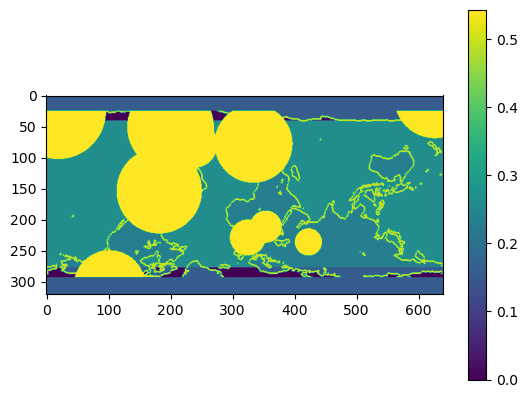

In [162]:
#### May 2 - Hydrogenic Bacteria in an ocean###
for wl in range(len(wav)):
    
    map.reset()
    image = image0.copy()

    image[:25] = spectra['snow'][wl, 1]
    image[293:] = spectra['snow'][wl, 1]
    image[25:41][image[25:41] == 1.] = spectra['snow'][wl, 1]
    image[277:293][image[277:293] == 1.] = spectra['snow'][wl, 1]
    image[41:277][image[41:277] == 0.] = spectra['hyd_ocean'][wl, 1]
    image[41:277][image[41:277] == 1.] = spectra['cont_noveg'][wl, 1]
    image[image == 5] = spectra['coast'][wl, 1]
    image[image == 3] = spectra['cloud'][wl, 1]
    
    # for i in range(len(cloud_pix)):
    #     lat = cloud_pix[i, 0]
    #     lon = cloud_pix[i, 1]
    #     r_pix = cloud_pix[i, 2]
    #     for x, y in np.ndindex(image.shape):
    #         if (x - lat)**2 + (y - lon)**2 < r_pix**2:
    #             image[x, y] = spectra['cloud'][wl, 1]

    earth_refl_spec[wl] = image

    map.load(image, smoothing = 0.1)
    specmap_y[wl] = map.y

    _, _, Y2P, P2Y, _, _ = map.get_pixel_transforms()
    p = Y2P.dot(map.y)

    #Pixel stretch to match max/min albedo to max/min pixel value
    maxi = np.max((spectra['cont_noveg'][wl, 1], spectra['cloud'][wl, 1], spectra['snow'][wl, 1], spectra['hyd_ocean'][wl, 1], spectra['coast'][wl, 1]))
    mini = np.min((spectra['cont_noveg'][wl, 1], spectra['cloud'][wl, 1], spectra['snow'][wl, 1], spectra['hyd_ocean'][wl, 1], spectra['coast'][wl, 1]))

    p = p / np.max(p) * (maxi - mini) + np.min(p)

    #Pixel shift to set min val 
    
    #shift = np.min(p) - 0.1         # shift the pixel values so that the minimum is 0.1
    shift = np.min(p) - mini      # shift the pixel values so that the minimum is ocean reflectance
    p = p - shift

    specmap_p[wl] = p

    y = P2Y.dot(p)

    specmap_y_shift[wl] = y

    minpix[wl] = np.min(p)
    maxpix[wl] = np.max(p)  
    
    #Times 0.5 added on 27/2 to try to reduce overall spherical albedo to more realistic values
    amps[wl] = y[0] * 0.5

    if wl == 57:
        print(np.max(image))
        plt.imshow(image)
        plt.colorbar()
        plt.show()
        scalarmap.load(image, smoothing = 0.1)

0.5434498


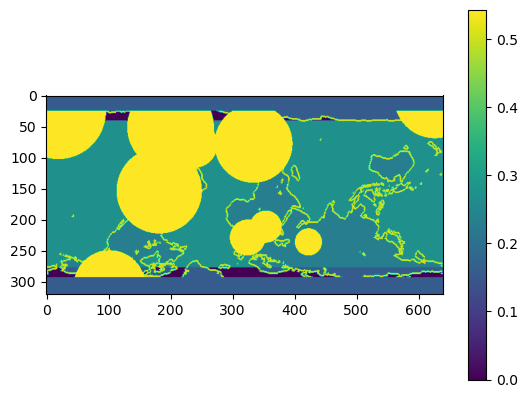

In [165]:
#### May 2 - Using same cloud model with Hydrogenic continuum in an ocean ###
for wl in range(len(wav)):
    
    map.reset()
    image = image0.copy()

    image[:25] = spectra['snow'][wl, 1]
    image[293:] = spectra['snow'][wl, 1]
    image[25:41][image[25:41] == 1.] = spectra['snow'][wl, 1]
    image[277:293][image[277:293] == 1.] = spectra['snow'][wl, 1]
    image[41:277][image[41:277] == 0.] = spectra['hyd_cont_ocean'][wl, 1]
    image[41:277][image[41:277] == 1.] = spectra['cont_noveg'][wl, 1]
    image[image == 5] = spectra['coast'][wl, 1]
    image[image == 3] = spectra['cloud'][wl, 1]
    
    # for i in range(len(cloud_pix)):
    #     lat = cloud_pix[i, 0]
    #     lon = cloud_pix[i, 1]
    #     r_pix = cloud_pix[i, 2]
    #     for x, y in np.ndindex(image.shape):
    #         if (x - lat)**2 + (y - lon)**2 < r_pix**2:
    #             image[x, y] = spectra['cloud'][wl, 1]

    earth_refl_spec[wl] = image

    map.load(image, smoothing = 0.1)
    specmap_y[wl] = map.y

    _, _, Y2P, P2Y, _, _ = map.get_pixel_transforms()
    p = Y2P.dot(map.y)

    #Pixel stretch to match max/min albedo to max/min pixel value
    maxi = np.max((spectra['cont_noveg'][wl, 1], spectra['cloud'][wl, 1], spectra['snow'][wl, 1], spectra['hyd_cont_ocean'][wl, 1], spectra['coast'][wl, 1]))
    mini = np.min((spectra['cont_noveg'][wl, 1], spectra['cloud'][wl, 1], spectra['snow'][wl, 1], spectra['hyd_cont_ocean'][wl, 1], spectra['coast'][wl, 1]))

    p = p / np.max(p) * (maxi - mini) + np.min(p)

    #Pixel shift to set min val 
    
    #shift = np.min(p) - 0.1         # shift the pixel values so that the minimum is 0.1
    shift = np.min(p) - mini      # shift the pixel values so that the minimum is ocean reflectance
    p = p - shift

    specmap_p[wl] = p

    y = P2Y.dot(p)

    specmap_y_shift[wl] = y

    minpix[wl] = np.min(p)
    maxpix[wl] = np.max(p)  
    
    #Times 0.5 added on 27/2 to try to reduce overall spherical albedo to more realistic values
    amps[wl] = y[0] * 0.5

    if wl == 57:
        print(np.max(image))
        plt.imshow(image)
        plt.colorbar()
        plt.show()
        scalarmap.load(image, smoothing = 0.1)

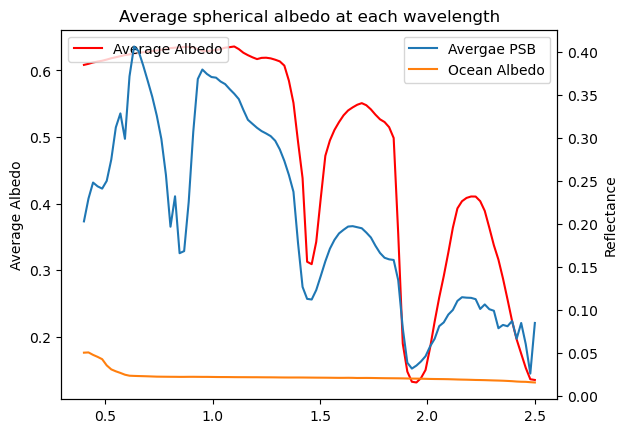

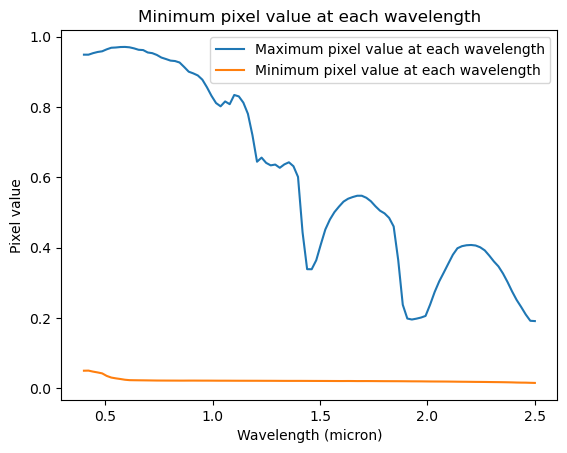

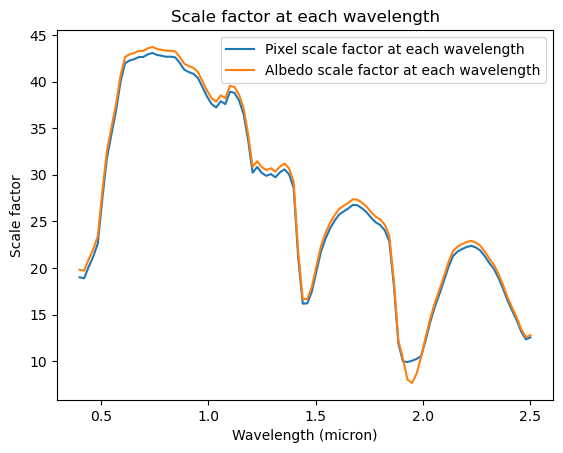

In [143]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(wav, amps, color = 'red', label = "Average Albedo")
# ax2.plot(wav, spectra['cont_warm'][:,1], label = "Continental Albedo")
ax2.plot(wav, spectra['PSB_avg'][:,1], label = "Avergae PSB")
ax2.plot(wav, spectra['sea'][:,1], label = "Ocean Albedo")
plt.title('Average spherical albedo at each wavelength')
plt.xlabel('Wavelength (micron)')
ax1.set_ylabel('Average Albedo')
ax2.set_ylabel('Reflectance')
ax1.legend(bbox_to_anchor=(0., 1.), loc='upper left')
ax2.legend()
plt.show()

plt.plot(wav, maxpix, label = "Maximum pixel value at each wavelength")
plt.plot(wav, minpix, label = "Minimum pixel value at each wavelength")
plt.title('Minimum pixel value at each wavelength')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Pixel value')
plt.legend()
plt.show()

max_albedo = np.zeros_like(wav)
min_albedo = np.zeros_like(wav)

for wl in range(len(wav)):
    max_albedo[wl] = np.max((spectra['cont_warm'][wl, 1], spectra['snow'][wl, 1], spectra['sea'][wl, 1], spectra['cloud'][wl, 1]))
    min_albedo [wl]= np.min((spectra['cont_warm'][wl, 1], spectra['snow'][wl, 1], spectra['sea'][wl, 1], spectra['cloud'][wl, 1]))

plt.plot(wav, maxpix/minpix, label = "Pixel scale factor at each wavelength")
plt.plot(wav, max_albedo/min_albedo, label = "Albedo scale factor at each wavelength")
plt.title('Scale factor at each wavelength')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Scale factor')
plt.legend()
plt.show()

In [77]:
print(amps)
print(np.where(amps == np.max(amps)))

[0.48791623 0.48928484 0.49021141 0.4907723  0.49107677 0.49136632
 0.49794914 0.50152532 0.49930973 0.49614562 0.4946849  0.4938661
 0.49240077 0.49228799 0.50016889 0.53300575 0.56551125 0.57763414
 0.58061322 0.58263541 0.58405685 0.58477814 0.58499774 0.58443209
 0.58360684 0.58052822 0.57542058 0.57190316 0.5706071  0.57053858
 0.57225019 0.57729872 0.57696925 0.5802089  0.5747371  0.56349711
 0.5503147  0.52787438 0.50138546 0.50815006 0.50404778 0.50057344
 0.49836102 0.48934335 0.4827828  0.46335023 0.42495573 0.35915871
 0.27109542 0.25060305 0.2647305  0.29137009 0.3280172  0.36336443
 0.38623766 0.40484952 0.41938578 0.43202501 0.44131146 0.44738379
 0.45248588 0.45560293 0.45166253 0.44425432 0.43210518 0.41977878
 0.40845764 0.38229248 0.33966914 0.24137071 0.14095939 0.11771387
 0.08869952 0.08399418 0.09780692 0.12695144 0.16288352 0.19705635
 0.2259032  0.25095285 0.27699996 0.29815371 0.31360817 0.32013686
 0.32348359 0.32091516 0.31156267 0.3003734  0.29685447 0.29226

In [ ]:
print(np.max((spectra['cont'][0,1], spectra['snow'][0,1], spectra['sea'][0,1], spectra['cloud'][0,1])))

0.989542


In [ ]:
testwav = 1.5
testwav = int((testwav - 0.4) / (2.5 - 0.4) * 100)
print(testwav)

map = starry.Map(ydeg=20, reflected=True)
map[1:,:]= specmap_y_shift[testwav][1:]/specmap_y_shift[testwav][0]
map.amp = specmap_y_shift[testwav][0]
map.show(projection="rect", illuminate=False, res=500, colorbar=True)

52


In [188]:
#####USE This one to define map (Apr 16) #####

specmap = starry.Map(ydeg=ydeg, reflected=True, nw = len(wav), wav = wav)

for wl in range(len(wav)):
    specmap[1:, :, wl] = specmap_y_shift[wl][1:]/specmap_y_shift[wl][0]
    specmap.amp[wl] = specmap_y_shift[wl][0]

In [ ]:
print(np.unravel_index(specmap_y.argmin(), specmap_y.shape))

(33, 27)


In [ ]:
lat, lon, value = map.minimize()
print(lat, lon, value)
plt.imshow(image, origin="lower", cmap="plasma", extent=(-180, 180, -90, 90))
plt.xlabel("longitude [deg]")
plt.ylabel("latitude [deg]")
plt.axvline(lon, color="k", ls="--")
plt.axhline(lat, color="k", ls="--")
plt.title("minimum: {0:.3f}".format(value))
plt.colorbar()

-26.48368687116919 -32.43690460442652 -0.007010234202826462


In [ ]:
ydeg = 25
specmap_y = np.zeros((len(wav), (ydeg+1)**2))
maps = ()

for wl in range(len(wav)):
    map = starry.Map(ydeg=ydeg, reflected=True)
    map.load(np.flipud(earth_refl_spec[wl]))
    specmap_y[wl] = map.y
    maps = maps + (map,)

In [ ]:
print(specmap_y.shape)

(100, 676)


In [ ]:
# amp = np.zeros(len(wav))
# for i in range(len(maps)):
#     amp[i] = maps[i].amp

plt.plot(wav, amp, label='amplitude at each wavelength')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

NameError: name 'amp' is not defined

In [ ]:
newmaps = ()
for wl in range(len(wav)):
    map = starry.Map(ydeg=ydeg, reflected=True, force_psd=True)
    map.load(np.flipud(earth_refl_spec[wl]))
    map.amp *= amp[wl]/map.amp
    specmap_y[wl] = map.y
    newmaps = newmaps + (map,)

In [ ]:
print(len(maps))

200


In [ ]:
lat = np.zeros_like(wav)
lon = np.zeros_like(wav)
value = np.zeros_like(wav)
amps = np.zeros_like(wav)


for i in range(100,200):
    lat[i-100], lon[i-100], value[i-100] = maps[i].minimize()
    amps[i-100] = maps[i].amp


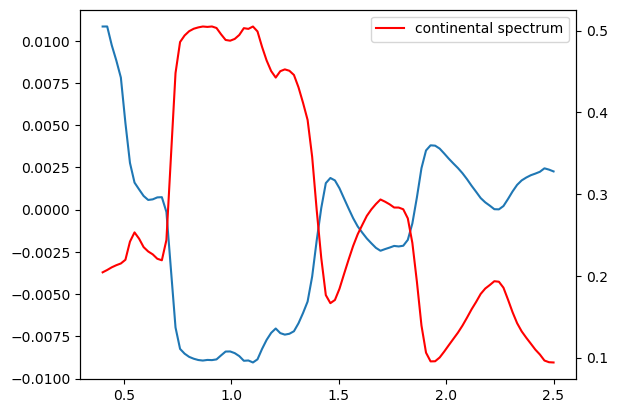

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(wav, value, label='minimum intensity value at each map')
ax2.plot(wav, spectra['cont'][:,1], label='continental spectrum', color='red')
plt.legend()
plt.show()

# plt.imshow(np.flipud(earth_refl_spec[int((testwav - 0.4) / (2.5 - 0.4) * 100)]), origin="lower", cmap="plasma", extent=(-180, 180, -90, 90))
# plt.plot(lon, lat, 'rx', label='minimum intensity value at each map')
# plt.title("minima")
# plt.colorbar()
# plt.show()

In [ ]:
def set_min(mins, amps, spec_y):
    new_spec_y = np.zeros_like(spec_y)
    min = np.min(mins)
    for i in range(len(amps)):
        fac = amp[i] / (amp[i] - np.pi * min)
        new_spec_y[i] = spec_y[i] * fac
    return new_spec_y

new_spec_y = set_min(value, amp, specmap_y)

In [ ]:
print(new_spec_y.shape) 

(100, 676)


In [ ]:
testmaps = ()
for wl in range(len(wav)):
    testmap = starry.Map(ydeg=ydeg, reflected=True)
    c = 0
    l = 1
    while l <= ydeg:
        m = -l
        while m <= l:
            testmap[l,m] = new_spec_y[wl][c]
            m += 1
            c += 1
        l += 1
    testmap.amp *= amp[wl]
    testmaps = testmaps + (testmap,)

In [ ]:
latt = np.zeros_like(wav)
lont = np.zeros_like(wav)
valuet = np.zeros_like(wav)

for i in range(len(testmaps)):
    latt[i], lont[i], valuet[i] = testmaps[i].minimize()

plt.plot(wav, valuet, label='minimum intensity value at each map')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Intensity')
plt.legend()
plt.show()


In [ ]:
# specmap = starry.Map(ydeg=ydeg, reflected=True, nw = len(wav))

# for wl in range(len(wav)):
#     c = 0
#     l = 1
#     while l <= ydeg:
#         m = -l
#         while m <= l:
#             specmap[l,m,wl] = specmap_y[wl][c]
#             m += 1
#             c += 1
#         l += 1

In [ ]:
def rescale_spectral_map(map):
    # Find the minimum
    _, _, I = map.minimize()
    # Scale the coeffs?
    if I < 0:
        fac = specmap.amp / (specmap.amp - np.pi * I)
        map[1:, :, :] *= fac

rescale_spectral_map(specmap)

NotImplementedError: Method not yet implemented for spectral maps.

In [ ]:
lat, lon, I = specmap.minimize()
print(lat, lon, I)

In [ ]:
r = 150E6/6400. # Earth - Sun distance in units of Earth radii

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('wavelength')
ax1.set_ylabel('flux', color=color)
ax1.plot(wav, specmap.flux(theta = 20, zs = r).reshape(-1), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('continental reflection spec', color=color)  # we already handled the x-label with ax1
ax2.plot(spectra['cont'][:,0], spectra['cont'][:,1], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
print(range(4))


range(0, 4)


In [82]:
def earth_refl_spec_obs(
        map,
        scalarmap, 
        num_obs = 30, 
        num_nights = 1,
        texp = 30.,             #Observational units assumed to be in minutes (texp, cadence)
        cadence = 60.,          
        phase_init = 90., 
        theta_init = 0., 
        snr = 30., 
        comp_time = 1.,         #Cadence of starry flux computations to be integrated    
        a = 150E6,              #Orbit/planet scales in units of km (a, R)
        Rp = 6400.,
        Rstar = 700000., 
        prot = 1., 
        porb = 365.25,          #Orbital and rotational periods in units of days (prot, porb)
        obl = 23.5,
        dist = 5.,             #Distance to system in parsecs
        plot = True
        ):

    if cadence < texp:
        print('Warning! Cadence is less than exposure time. Correct if you want meaningful results.')
    
    ###########################################################
    # Compute the observation times and number of evaluations #
    ###########################################################    
    obs_per_night = np.zeros(num_nights)
    for night in range(num_nights):
        obs_per_night[night] = round(num_obs / num_nights)
        #print(obs_per_night[night])
        if obs_per_night[night] * cadence > (12 * 60.):
            print('Warning! Observation time per night is greater than 12 hours. Conisder breaking into multiple nights for ground based observations.')
         
    # obs_per_night[-1] = num_obs - np.sum(obs_per_night[:-1])
    # if obs_per_night[-1] * cadence > (12 * 60.):
    #     print('Warning! Observation time per night is greater than 12 hours. Conisder breaking into multiple nights for ground based observations.')

    obs_time = (num_nights - 1) * 24. * 60. + obs_per_night[-1] * cadence

    num_eval = int(obs_time/comp_time)

    t_obs = np.zeros((num_nights, int(obs_per_night[0])))
    for night in range(num_nights):
        t_obs[night] = np.arange(night * 24. * 60., night * 24. * 60. + obs_per_night[night] * cadence, cadence)
        #print(t_obs[night])
    
    # t_obs[-1] = np.arange((num_nights - 1) * 24. * 60., (num_nights - 1) * 24. * 60. + obs_per_night[-1] * cadence, cadence)

    #obs_per_night = round(num_obs / num_nights)
    #print("obs per night:", obs_per_night)
    #obs_time = (num_nights - 1) * 24. * 60. + (num_obs - (num_nights-1) * obs_per_night) * cadence
    #print("obs time:", obs_time)
    #print("24 hours = ", 24. * 60., " minutes.")
    #num_eval = int(obs_time / comp_time)

    # t_obs = np.arange(0, obs_per_night * cadence, cadence)
    # if num_nights > 2:
    #     for night in range(num_nights - 2):
    #             start = (night+1) * 24 * 60.
    #             t_obs = np.concatenate((t_obs,np.arange(start, start + obs_per_night * cadence, cadence)))
    # start = (num_nights-1) * 24 * 60.
    # if num_nights != 1:
    #     t_obs = np.concatenate((t_obs, np.arange(start, start + (num_obs - (num_nights-1) * obs_per_night) * cadence, cadence)))
  
    #print(t_obs)
    #print(len(t_obs))
   

    # if obs_per_night * cadence > (12 * 60.) or (num_obs - (num_nights-1) * obs_per_night) * cadence > (12 * 60.):
    #     print('Warning! Observation time per night is greater than 12 hours. Conisder breaking into multiple nights for ground based observations.')

    #########################################################
    # Compute planet's orbital position at each observation #
    #########################################################
    
    phase_final = phase_init + obs_time / (porb * 24 * 60.) * 360.
    obs_phase = np.linspace(phase_init, phase_final, num_eval)

    r = a/Rp # Planet - star distance in units of Earth radii
    #Phase = 0 is secondary eclipse, phase = 180 is transit
    x = r * np.sin(np.deg2rad(obs_phase))
    z = r * np.cos(np.deg2rad(obs_phase))
    y = np.zeros_like(x)

    ang_sep = x * Rp/(dist * 30856775814671.914)


    ################################################################
    # Compute the rotation angle of the planet at each observation #
    ################################################################

    theta_final = theta_init + obs_time / (prot * 24 * 60.) * 360.
    theta = np.linspace(theta_init, theta_final, num_eval)

    #Compute the flux throughout the observation
    map.obl = obl
    flux = map.flux(theta = theta, xs = x, ys = y, zs = z, rs = Rstar/Rp)


    #############################################################
    # Integrate over the exposure time to get the observed flux #
    #############################################################
    int_flux = np.zeros((num_nights, int(obs_per_night[0]), len(map.wav)))
    
    if num_nights == 1:
        obs_params = {
            'x': np.zeros(2), 
            'z': np.zeros(2), 
            'theta': np.zeros(2),
            'ang_sep': np.zeros(2),
            'obs_phase': np.zeros(2)
            }
        start = int(t_obs[0] / comp_time)
        end = start + int(texp / comp_time) - 1
        int_flux[0] = integrate.simpson(flux[start:end], dx = comp_time, axis = 0)

        obs_params['x'][0] = x[start]
        obs_params['z'][0] = z[start]
        obs_params['theta'][0] = theta[start]
        obs_params['ang_sep'][0] = ang_sep[start]
        obs_params['obs_phase'][0] = obs_phase[start]

        obs_params['x'][1] = x[end]
        obs_params['z'][1] = z[end]
        obs_params['theta'][1] = theta[end]
        obs_params['ang_sep'][1] = ang_sep[end]
        obs_params['obs_phase'][1] = obs_phase[end]
    else:
        for night in range(num_nights):
            obs_params = {
                'x': np.zeros((num_nights, int(obs_per_night[0]))), 
                'z': np.zeros((num_nights, int(obs_per_night[0]))), 
                'theta': np.zeros((num_nights, int(obs_per_night[0]))),
                'ang_sep': np.zeros((num_nights, int(obs_per_night[0]))),
                'obs_phase': np.zeros((num_nights, int(obs_per_night[0])))
                }
            for i in range(len(t_obs[night])):
                start = int(t_obs[night][i] / comp_time)
                #print(start)
                end = start + int(texp / comp_time)
                #print(end)
                int_flux[night][i] = integrate.simpson(flux[start:end], dx = comp_time, axis = 0)

                obs_params['x'][night][i] = x[start]
                obs_params['z'][night][i] = z[start]
                obs_params['theta'][night][i] = theta[start]
                obs_params['ang_sep'][night][i] = ang_sep[start]
                obs_params['obs_phase'][night][i] = obs_phase[start]


    #########################
    # Add noise to the flux #
    #########################

    signal = np.max(int_flux) - np.min(int_flux)
    scale = signal / snr
    print(scale)
    noise = np.random.normal(0, scale, size = (num_nights, int(obs_per_night[0]), len(map.wav)))
    int_flux_noise = int_flux + noise

    R = .700 / ((wav[-1] - wav[0])/len(wav)) # Resolution

    print("This observation lasts for {} days at R = {} (at 700 nm)."
        .format(
            np.round(obs_time/(60*24), decimals=2), 
            np.round(R, decimals = 2)
            ))
    
    print("The planet moves from phase angle between {} and {} degrees and at a rotation angle between {} and {} degrees."
          .format(
            obs_phase[0], 
            np.round(obs_phase[-1], decimals=1), 
            theta[0], 
            np.round(theta[-1]%360., decimals=1)
    ))

    print("The planet completes {} rotations and {} orbits."
          .format(
            np.round((theta[-1] - theta[0])/360., decimals=2),
            np.round((obs_phase[-1] - obs_phase[0])/360., decimals=2)
          ))
    
    ##########################
    # Plot the observed flux #
    ##########################
    # mpl.rcParams.update(mpl.rcParamsDefault)
    # plt.rcParams['text.usetex'] = False
    elt_angles = (2*700E-9/38.5, 3*700E-9/38.5)
    elt_labels = ('2lambda/D', '3lambda/D')

    if plot == True:
        # Create a figure and axes
        if num_nights == 1:
            fig, axs = plt.subplots(5, 1, figsize=(10, 37.5))

            ax = axs[0]
            ax.plot(map.wav, int_flux[0][0])
            ax.set_xlabel('Wavelength (micron)')
            ax.set_ylabel('Flux')
            ax.set_title('Simulated Reflection Spectrum (No Noise)')

            ax = axs[1]
            ax.errorbar(map.wav, int_flux_noise[0][0], yerr = scale, fmt = 'o')
            ax.plot(map.wav, int_flux[0][0], color = 'black', alpha = 0.5)
            ax.set_xlabel('Wavelength (micron)')
            ax.set_ylabel('Flux')
            ax.set_title('Simulated Reflection Spectrum (With Noise)')

            ax = axs[2]
            scalarmap.show(
                theta = obs_params['theta'][0], 
                xs = obs_params['x'][0], 
                ys = np.zeros_like(obs_params['x'][0]), 
                zs = obs_params['z'][0], 
                ax = ax)
            
            ax = axs[3]
            scalarmap.show(
                theta = obs_params['theta'][-1], 
                xs = obs_params['x'][-1], 
                ys = np.zeros_like(obs_params['x'][-1]), 
                zs = obs_params['z'][-1], 
                ax = ax)
            
            ax = axs[4]
            ax.plot(np.linspace(0, texp, 20), np.linspace(obs_params['ang_sep'][0], obs_params['ang_sep'][-1], 20))
            ax.hlines(elt_angles[0], 0, texp, color = 'red', linestyle = '--', label = elt_labels[0])
            ax.hlines(elt_angles[1], 0, texp, color = 'blue', linestyle = '--', label = elt_labels[1])
            ax.set_xlabel('Obs Time (Night {})'.format(night + 1))
            ax.set_ylabel('Angular Separation')
            ax.legend()

            axs[0].set_title('Simulated Reflection Spectrum (No Noise)')
            axs[1].set_title('Simulated Reflection Spectrum (With Noise)')
            axs[2].set_title('Illumination of Planet - Start of night')
            axs[3].set_title('Illumination of Planet - End of night')
            axs[4].set_title('Angular Separation')


            plt.show()

        else:
            fig, axs = plt.subplots(num_nights, 5, figsize=(37.5,5 * num_nights))
            cmap = plt.get_cmap('viridis')

            for night in range(num_nights):
                # Get the current axis
                ax = axs[night][0]
                # Create a color mapping
                norm = plt.Normalize(vmin=np.min(int_flux[night]*1E9), vmax=np.max(int_flux[night]*1E9))
                # Plot the flux as an image with color mapping
                im = ax.imshow(int_flux[night]*1E9, cmap=cmap, norm=norm, aspect='auto', origin = 'lower',
                                extent=(wav[0], wav[-1], t_obs[night][0] - night * 24 * 60., t_obs[night][-1] - night * 24 * 60.))
                # Add a color bar to show the mapping
                cbar = ax.figure.colorbar(im, ax=ax)
                # Add labels and titles
                ax.set_ylabel('Obs Time (Night {})'.format(night + 1))
                cbar.ax.set_ylabel('Flux (ppb)')
                ax.set_xlabel('Wavelength (micron)')

                ax = axs[night][1]
                norm = plt.Normalize(vmin=np.min(int_flux_noise[night]*1E9), vmax=np.max(int_flux_noise[night]*1E9))
                im = ax.imshow(int_flux_noise[night]*1E9, cmap=cmap, norm=norm, aspect='auto', origin = 'lower',
                                extent=(wav[0], wav[-1], t_obs[night][0] - night * 24 * 60., t_obs[night][-1] - night * 24 * 60.))
                cbar = ax.figure.colorbar(im, ax=ax)
                
                ax.set_xlabel('Wavelength (micron)')
                ax.set_ylabel('Obs Time (Night {})'.format(night + 1))
                cbar.ax.set_ylabel('Flux (ppb)')

                ax = axs[night][2]
                scalarmap.show(
                    theta = obs_params['theta'][night][0], 
                    xs = obs_params['x'][night][0], 
                    ys = np.zeros_like(obs_params['x'][night][0]), 
                    zs = obs_params['z'][night][0], 
                    ax = ax)
                
                ax = axs[night][3]
                scalarmap.show(
                    theta = obs_params['theta'][night][-1], 
                    xs = obs_params['x'][night][-1], 
                    ys = np.zeros_like(obs_params['x'][night][-1]), 
                    zs = obs_params['z'][night][-1], 
                    ax = ax)
                
                ax = axs[night][4]
                ax.plot(t_obs[night], obs_params['ang_sep'][night])
                ax.hlines(elt_angles[0], t_obs[night][0], t_obs[night][-1], color = 'red', linestyle = '--', label = elt_labels[0])
                ax.hlines(elt_angles[1], t_obs[night][0], t_obs[night][-1], color = 'blue', linestyle = '--', label = elt_labels[1])
                ax.set_xlabel('Obs Time (Night {})'.format(night + 1))
                ax.set_ylabel('Angular Separation')
                ax.legend()
                ax_b = ax.twinx()
                ax_b.plot(t_obs[night], obs_params['obs_phase'][night], color = 'green')
                ax_b.set_ylabel('Phase Angle')

            axs[0][0].set_title('Simulated Reflection Spectrum (No Noise)')
            axs[0][1].set_title('Simulated Reflection Spectrum (With Noise)')
            axs[0][2].set_title('Illumination of Planet - Start of night')
            axs[0][3].set_title('Illumination of Planet - End of night')
            axs[0][4].set_title('Angular Separation')


            plt.show()

    ### DONE
    ### Add in day/night break into cadence 
    ### Need texp AND cadence
    ### Clouds

    ### TO INVESTIGATE
    ### consider weather (bad nights)...best case scenario? Worst case?
    ### If you signal multiples of the same phase, do you get better or worse than randomly integrated over phase?
    ### Add in rondomization of rotational period, obliquity, planetary properties rather than Earth
    ### Should you take a hemispherical shot? Or take a 10 degree shot over and over again and build up the signal at that phase?
    ### HZ M DWARF PLANETS ARE (probably) TIDALLY LOCKED! - How will signal vary with fixed Earth longitude?
    
    ### TO DO
    ### Then add Earth from NASA PSG?
    ### Build in random continents
    ### How much ocean vs continent on Mars x billion years ago? How much ocean vs continent on Venus? 
    ### Can make an estimate range to produce representative guess at continental converage?
    ### Need to build angular distance at different phases into model - higher angle = easier to resolve, lower angle = bigger reflected surface
    ### See ESPRESSO ETC for S/N calculator

    return int_flux, int_flux_noise, flux, obs_phase, theta, obs_time, t_obs

2.4196986528684054e-05
This observation lasts for 0.33 days at R = 33.33 (at 700 nm).
The planet moves from phase angle between 20.0 and 30.7 degrees and at a rotation angle between 360.0 and 10.7 degrees.
The planet completes 0.03 rotations and 0.03 orbits.


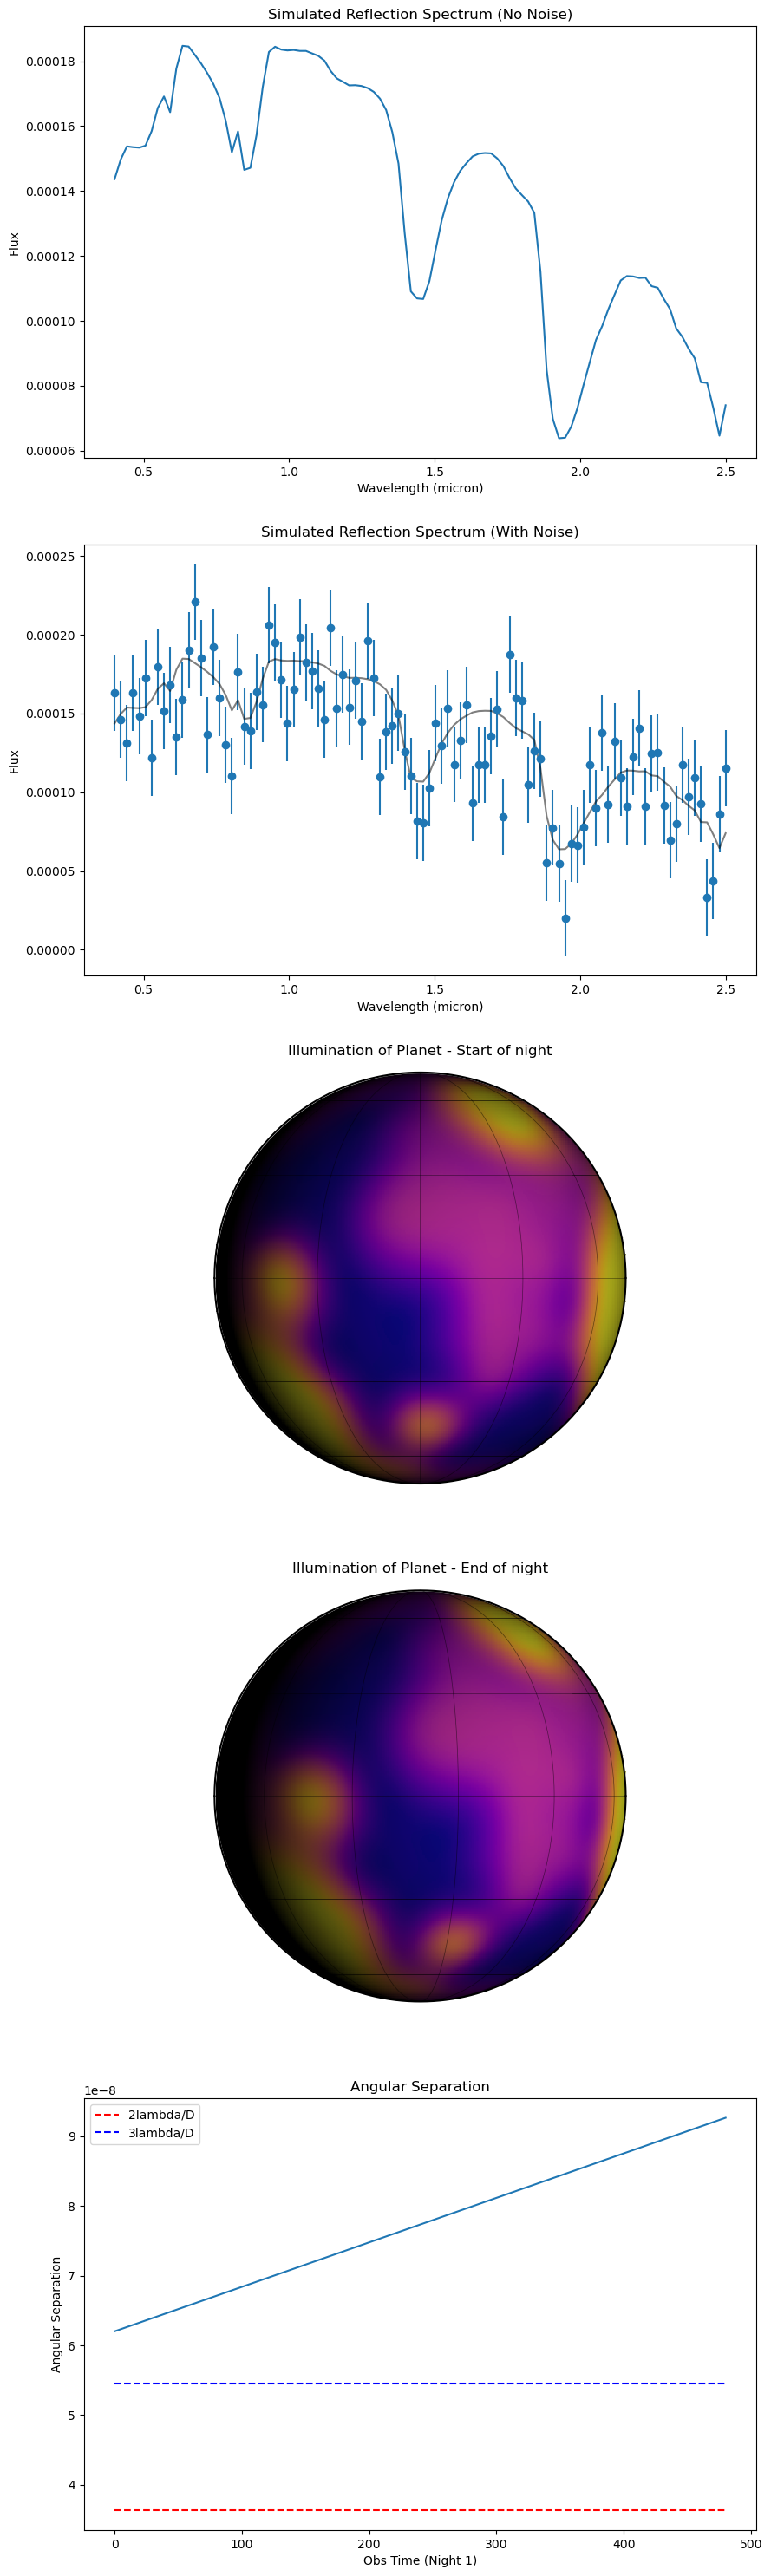

In [189]:
R_prox_cent_b = 1.07 * 6371.
a_prox_cent_b = 0.04856 * 150E6
P_prox_cent_b = 11.1868
dist_prox_cent_b = 1.30197
R_prox_star = 0.141 * 695508

theta_range = np.linspace(0, 360, 6)


int_flux, int_flux_noise, flux, obs_phase, theta, obs_time, t_obs = earth_refl_spec_obs(
    specmap,
    scalarmap, 
    num_obs = 1, 
    num_nights = 1, 
    cadence = 8 * 60., 
    texp = 8 * 60., 
    phase_init = 20., 
    theta_init = 360., 
    snr = 5.,
    Rp = R_prox_cent_b,
    a = a_prox_cent_b,
    porb = P_prox_cent_b,
    prot = P_prox_cent_b,
    dist = dist_prox_cent_b
    )


(5, 30, 100)


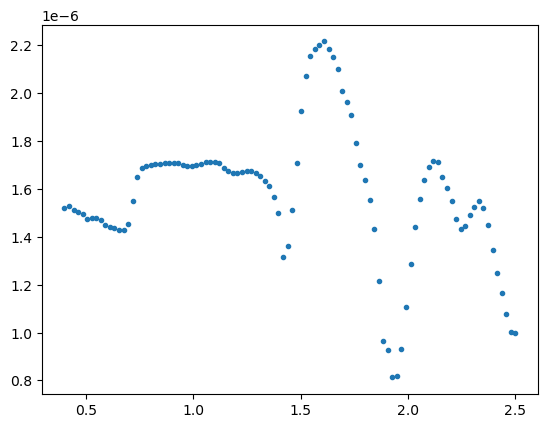

In [ ]:
print(int_flux.shape)

plt.plot(wav, int_flux[2,0])

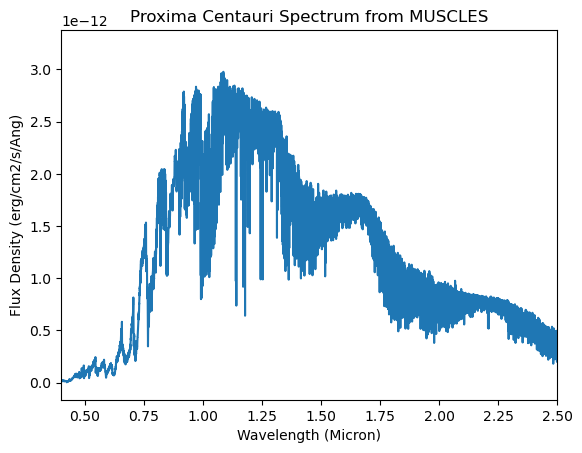

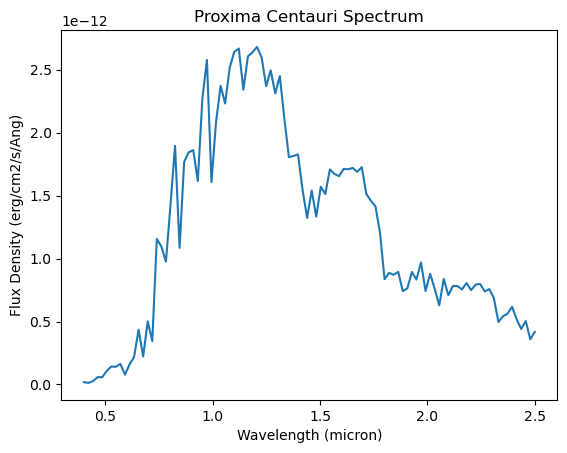

In [ ]:
spec = fits.getdata(
    '/Users/andrew/Desktop/QMUL/PhD/photosynth/hlsp_muscles_multi_multi_gj551_broadband_v22_const-res-sed.fits',1)
plt.plot(spec['WAVELENGTH']/10/1000,spec['FLUX'])
plt.xlim(0.4, 2.5)
plt.xlabel('Wavelength (Micron)')
plt.ylabel('Flux Density (erg/cm2/s/Ang)')
plt.title('Proxima Centauri Spectrum from MUSCLES')
plt.show()

prox_spec = np.interp(wav, spec['WAVELENGTH']/10/1000, spec['FLUX'])
spectra['prox_cent'] = np.column_stack((wav, prox_spec))

plt.plot(spectra['prox_cent'][:,0], spectra['prox_cent'][:,1])
plt.xlabel('Wavelength (micron)')
plt.ylabel('Flux Density (erg/cm2/s/Ang)')
plt.title('Proxima Centauri Spectrum')
plt.show()

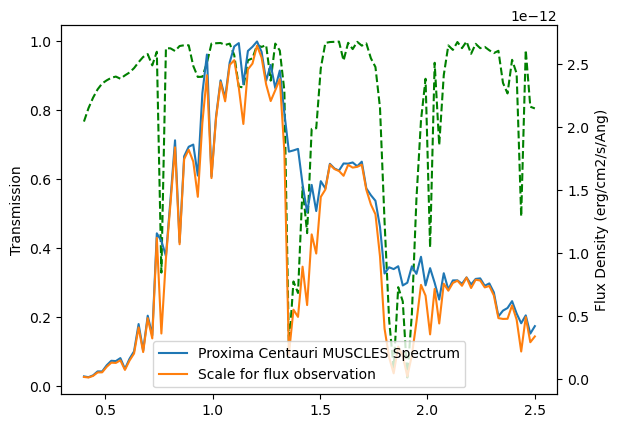

In [ ]:
earth_wav, earth_trans, _, _, _, _, _, _, _, _, _, _ = np.loadtxt(
    '/Users/andrew/Desktop/QMUL/PhD/photosynth/Earth_trans.txt', skiprows=7, unpack=True) 

earth_trans = np.interp(wav, earth_wav/1000., earth_trans)
earth_trans = np.column_stack((wav, earth_trans))

# M_wav, M_inten = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/2800K_spectrum.txt', unpack=True)

# M_inten = np.interp(wav, M_wav/1000., M_inten)
# M_inten = np.column_stack((wav, M_inten/np.max(M_inten)))

scale = np.multiply(earth_trans[:,1], spectra['prox_cent'][:,1])

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(earth_trans[:,0], earth_trans[:,1], label='Earth Transmission Spectrum', color = 'green', linestyle = '--')
ax2.plot(spectra['prox_cent'][:,0], spectra['prox_cent'][:,1], label='Proxima Centauri MUSCLES Spectrum')
ax2.plot(wav, scale, label='Scale for flux observation')
plt.xlabel('Wavelength (micron)')
ax1.set_ylabel('Transmission')
ax2.set_ylabel('Flux Density (erg/cm2/s/Ang)')
plt.legend()
plt.show()

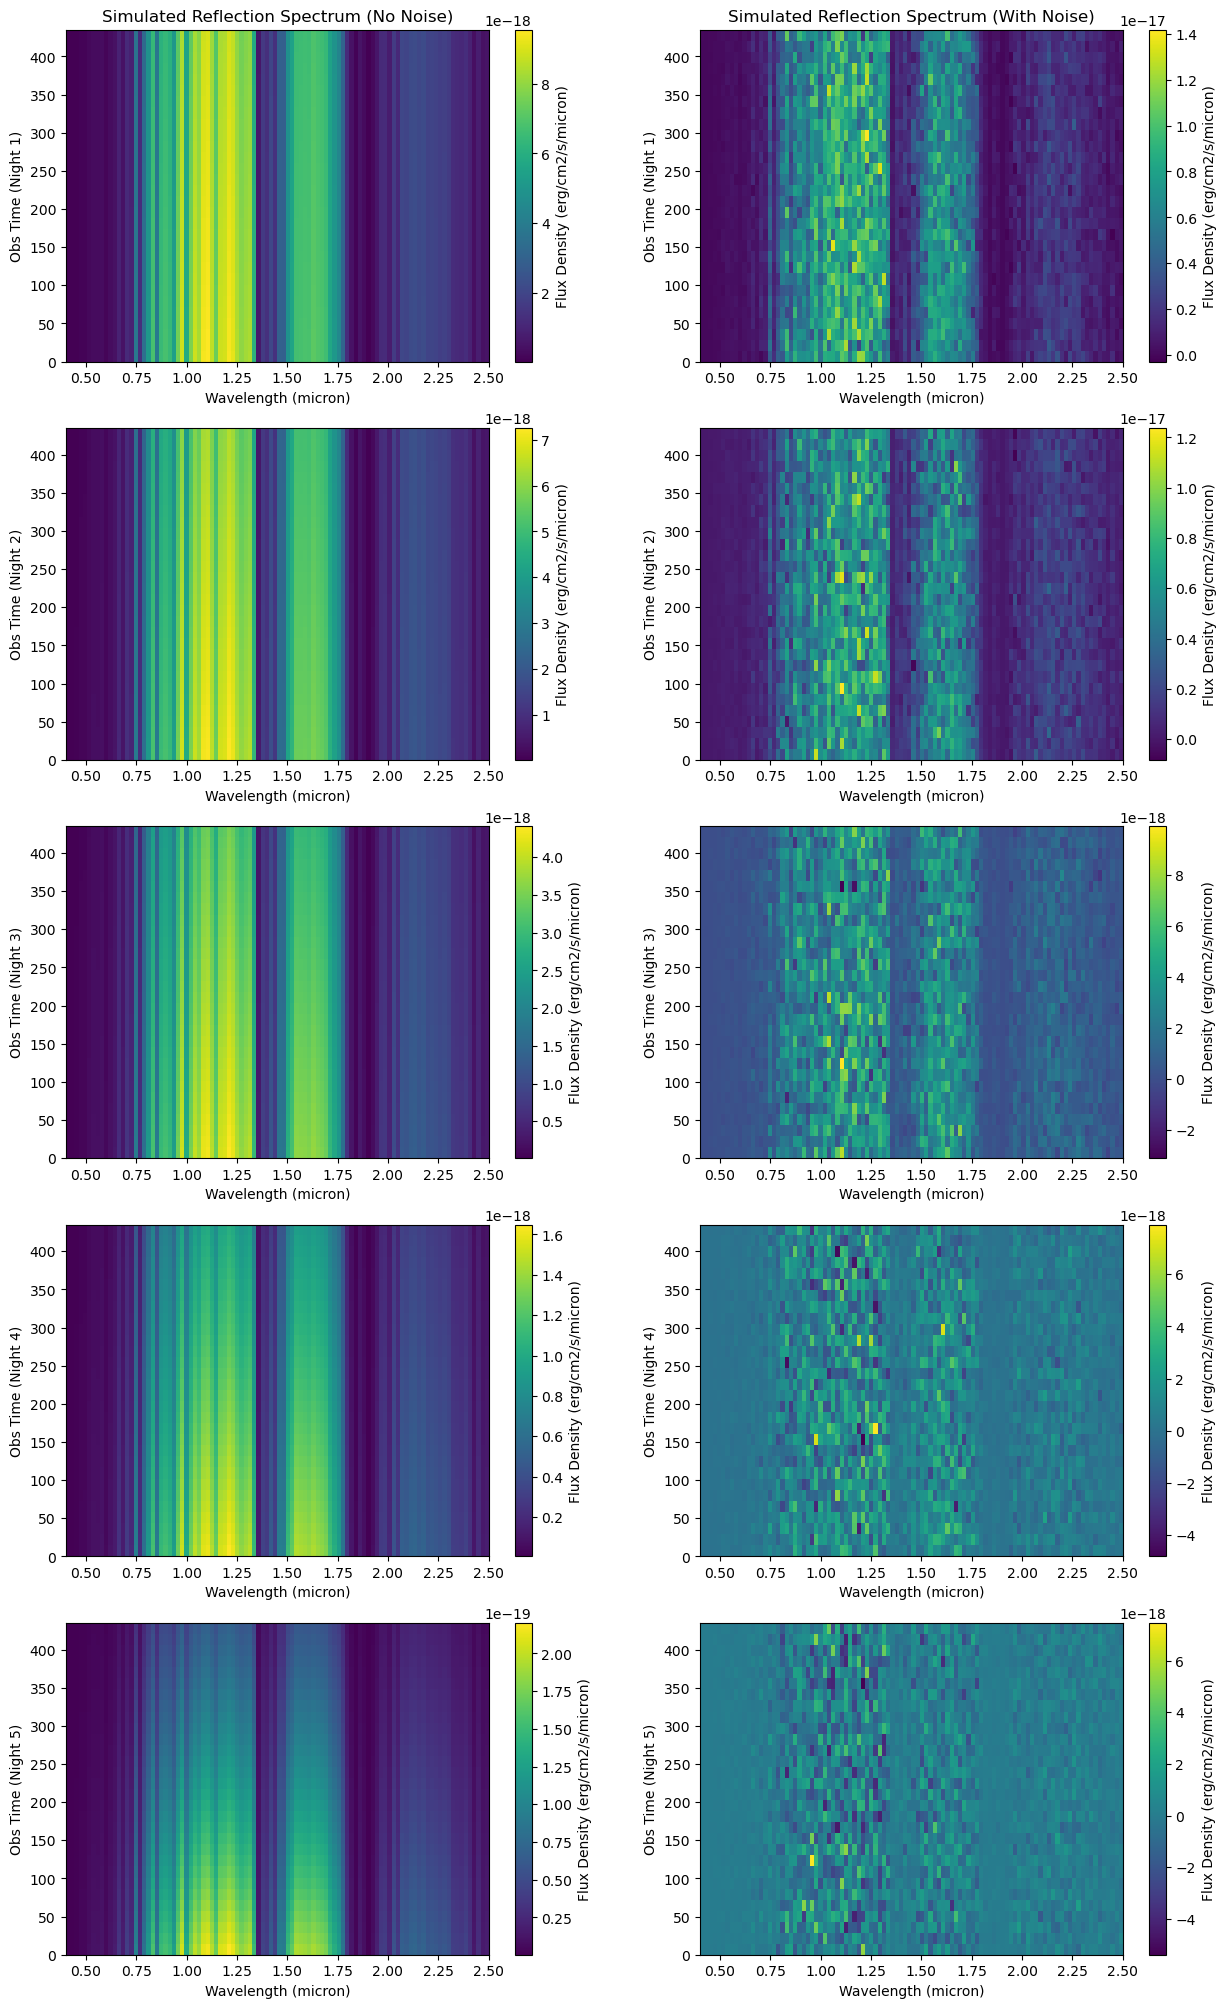

In [ ]:
num_nights = 5

int_flux_scaled = np.zeros_like(int_flux)
int_flux_noise_scaled = np.zeros_like(int_flux_noise)

for night in range(num_nights):
    int_flux_scaled[night] = np.multiply(int_flux[night], scale)
    int_flux_noise_scaled[night] = np.multiply(int_flux_noise[night], scale)

# Create a figure and axes
fig, axs = plt.subplots(num_nights, 2, figsize=(15,5 * num_nights))
cmap = plt.get_cmap('viridis')

for night in range(num_nights):
    # Get the current axis
    ax = axs[night][0]
    # Create a color mapping
    norm = plt.Normalize(vmin=np.min(int_flux_scaled[night]), vmax=np.max(int_flux_scaled[night]))
    # Plot the flux as an image with color mapping
    im = ax.imshow(int_flux_scaled[night], cmap=cmap, norm=norm, aspect='auto', origin = 'lower',
                    extent=(wav[0], wav[-1], t_obs[night][0] - night * 24 * 60., t_obs[night][-1] - night * 24 * 60.))
    # Add a color bar to show the mapping
    cbar = ax.figure.colorbar(im, ax=ax)
    # Add labels and titles
    ax.set_ylabel('Obs Time (Night {})'.format(night + 1))
    cbar.ax.set_ylabel('Flux Density (erg/cm2/s/micron)')
    ax.set_xlabel('Wavelength (micron)')

    ax = axs[night][1]
    norm = plt.Normalize(vmin=np.min(int_flux_noise_scaled[night]), vmax=np.max(int_flux_noise_scaled[night]))
    im = ax.imshow(int_flux_noise_scaled[night], cmap=cmap, norm=norm, aspect='auto', origin = 'lower',
                    extent=(wav[0], wav[-1], t_obs[night][0] - night * 24 * 60., t_obs[night][-1] - night * 24 * 60.))
    cbar = ax.figure.colorbar(im, ax=ax)
    
    ax.set_xlabel('Wavelength (micron)')
    ax.set_ylabel('Obs Time (Night {})'.format(night + 1))
    cbar.ax.set_ylabel('Flux Density (erg/cm2/s/micron)')
 

axs[0][0].set_title('Simulated Reflection Spectrum (No Noise)')
axs[0][1].set_title('Simulated Reflection Spectrum (With Noise)')


plt.show()


# norm1 = plt.Normalize(vmin=np.min(int_flux*1E9), vmax=np.max(int_flux*1E9))
# norm2 = plt.Normalize(vmin=np.min(int_flux_noise*1E9), vmax=np.max(int_flux_noise*1E9))

# # Plot the flux as an image with color mapping
# im = ax1.imshow(int_flux*1E9, cmap=cmap, norm=norm1, aspect='auto', origin = 'lower',
#                extent=(wav[0], wav[-1], 0, obs_time/(60*24)))

# im2 = ax2.imshow(int_flux_noise*1E9, cmap=cmap, norm=norm2, aspect='auto', origin = 'lower',
#                extent=(wav[0], wav[-1], 0, obs_time/(60*24)))

# # Add a color bar to show the mapping
# cbar = ax1.figure.colorbar(im, ax=ax1)
# cbar = ax2.figure.colorbar(im2, ax=ax2)

# # Add labels and titles
# ax1.set_xlabel('Wavelength (micron)')
# ax2.set_xlabel('Wavelength (micron)')
# ax1.set_ylabel('Obs Time (days)')
# cbar.ax.set_ylabel('Flux (ppb)')
# ax1.set_title('Simulated Reflection Spectrum (No Noise)')
# ax2.set_title('Simulated Reflection Spectrum (With Noise)')

# Show the plot
# plt.show()

(5, 30, 100)


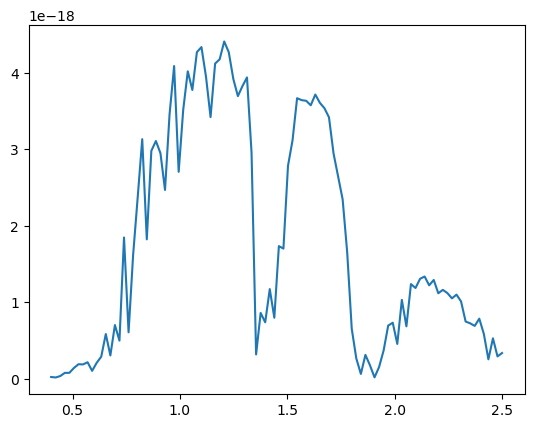

In [ ]:
print(int_flux_scaled.shape)

plt.plot(wav, int_flux_scaled[2,0])
plt.show()

(4, 30, 100)


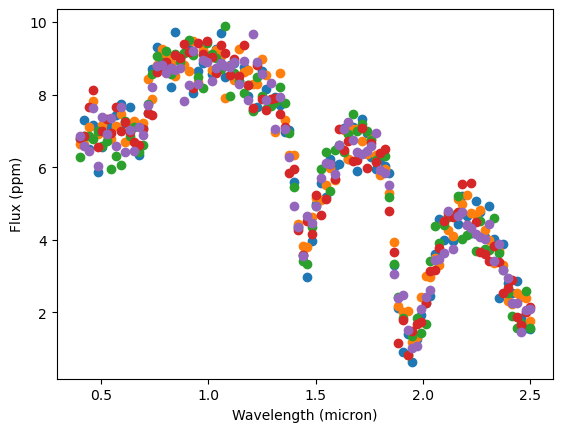

In [ ]:
print(int_flux.shape)

for i in range(len(int_flux[0][0:5])):
    plt.plot(wav, (int_flux_noise[0][i]) * 1E6, 'o', label='flux at time ' + str(i))

plt.xlabel('Wavelength (micron)')
plt.ylabel('Flux (ppm)')
#plt.legend()
plt.show()

In [ ]:
dist = 150E6              #Orbital distances in units of km (a, R)
R = 6400. 
r = dist/R

theta = np.linspace(0, 360, 1000)
flux_full = specmap.flux(theta = theta, xs = 0, ys = 0, zs = r, normalize = False)
print(flux_full.shape)

(1000, 100)


In [ ]:
#make a color map plot with forest.wav on the x axis and theta on the y axis, with flux as the color

# Create a figure and axes
fig, ax = plt.subplots()

# Use the "viridis" colormap for flux
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=np.min(flux_full), vmax=np.max(flux_full))

# Plot the flux as an image with color mapping
im = ax.imshow(flux_full, cmap=cmap, norm=norm, aspect='auto',
               extent=(wav[0], wav[-1], theta[-1], theta[0]))

# Add a color bar to show the mapping
cbar = ax.figure.colorbar(im, ax=ax)

# Add labels and titles
ax.set_xlabel('Wavelength (micron)')
ax.set_ylabel('Theta (degree)')
cbar.ax.set_ylabel('Flux (ppb)')
ax.set_title('One day of reflected light in full phase')

# Show the plot
plt.show()

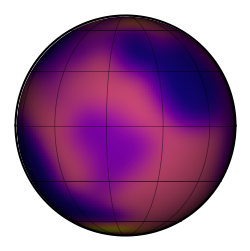

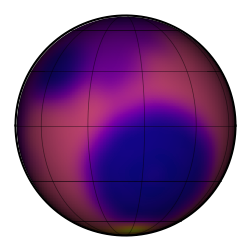

In [ ]:
map.show(theta=50, xs=0, ys=0, zs=r)
map.show(theta=250, xs=0, ys=0, zs=r)
map.show(colorbar=True, projection='rect', illuminate = False)

In [ ]:
test_phase1 = 330
test_phase2 = 150

tp1 = int(test_phase1/360 * 1000)
tp2 = int(test_phase2/360 * 1000)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('wavelength (micron)')
ax1.set_ylabel('flux', color=color)
ax1.plot(wav, flux_full[tp1], label='{} degrees'.format(test_phase1), color= 'red')
ax1.plot(wav, flux_full[tp2], label='{} degrees'.format(test_phase2), color= 'blue')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc = 'upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('reflection spec', color=color)  # we already handled the x-label with ax1
ax2.plot(spectra['cont'][:,0], spectra['cont'][:,1], label='Continental reflectance', color='green')
ax2.plot(spectra['sea'][:,0], spectra['sea'][:,1], label='Ocean Reflectance', color='orange')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc = 'right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('One day at full phase')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (3120,) and (1000,)

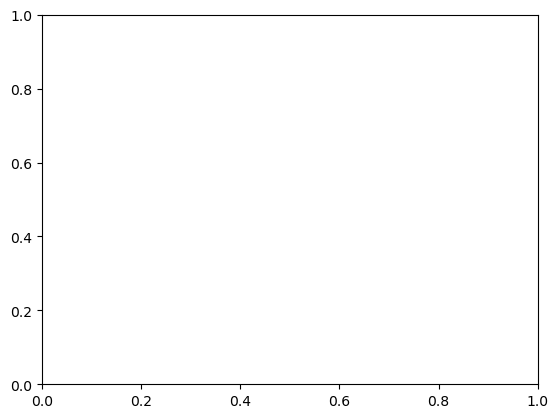

In [ ]:
flux_full_white = np.mean(flux_full, axis = 1)
flux_full_day = np.mean(flux_full, axis = 0)

plt.plot(theta, flux_full_white*1E9)
plt.xlabel('theta')
plt.ylabel('Flux (ppb)')
plt.title('Mean flux at full phase')
plt.show()

net_albedo_from_paper = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/EarthSurface.txt', skiprows=1)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax1.plot(wav, flux_full[tp2], label='{} degrees'.format(test_phase2), color= 'blue')   
ax2.plot(net_albedo_from_paper[:,0], net_albedo_from_paper[:,1], label='Net albedo from paper', color = 'red')
plt.xlabel('Wavelength (nm)')
ax1.set_ylabel('Flux (ppb)')
ax2.set_ylabel('Net albedo')
plt.title('Mean flux at full phase')
ax1.legend()
ax2.legend(loc = 'lower right')
plt.show()


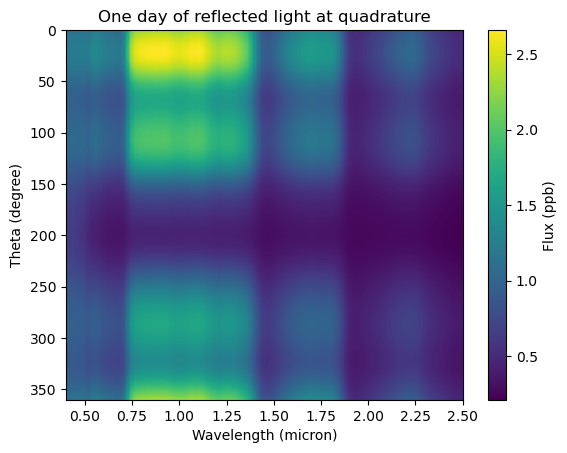

In [ ]:
theta = np.linspace(0, 360, 1000)
flux_quad = specmap.flux(theta = theta, xs=r, ys = 0, zs=0, normalize = False)

# Create a figure and axes
fig, ax = plt.subplots()

# Use the "viridis" colormap for flux
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=np.min(flux_quad*10E9), vmax=np.max(flux_quad*10E9))

# Plot the flux as an image with color mapping
im = ax.imshow(flux_quad*10E9, cmap=cmap, norm=norm, aspect='auto',
               extent=(wav[0], wav[-1], theta[-1], theta[0]))

# Add a color bar to show the mapping
cbar = ax.figure.colorbar(im, ax=ax)

# Add labels and titles
ax.set_xlabel('Wavelength (micron)')
ax.set_ylabel('Theta (degree)')
cbar.ax.set_ylabel('Flux (ppb)')
ax.set_title('One day of reflected light at quadrature')

# Show the plot
plt.show()

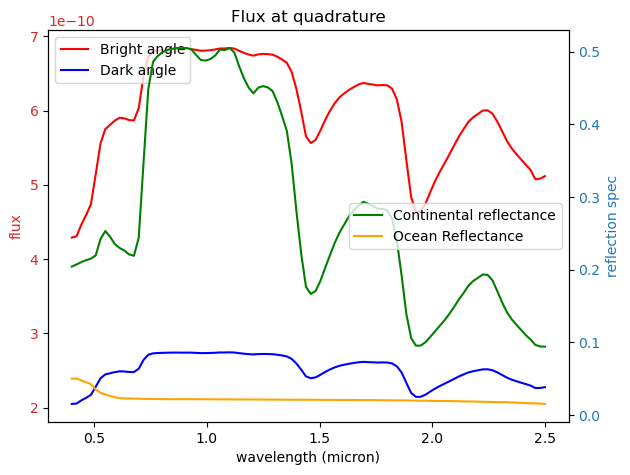

In [ ]:
theta_bright = 0
theta_dark = 165

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('wavelength (micron)')
ax1.set_ylabel('flux', color=color)
ax1.plot(wav, flux_quad[int(theta_bright/360*1000)], label='Bright angle', color= 'red')
ax1.plot(wav, flux_quad[int(theta_dark/360*1000)], label='Dark angle', color= 'blue')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc = 'upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('reflection spec', color=color)  # we already handled the x-label with ax1
ax2.plot(spectra['cont'][:,0], spectra['cont'][:,1], label='Continental reflectance', color='green')
ax2.plot(spectra['sea'][:,0], spectra['sea'][:,1], label='Ocean Reflectance', color='orange')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc = 'right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Flux at quadrature')
plt.show()

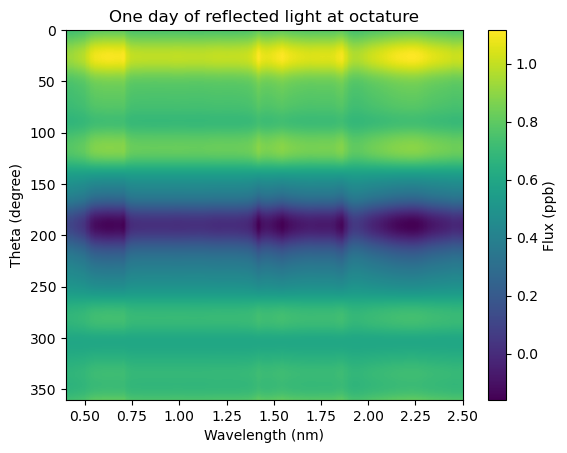

In [ ]:
theta = np.linspace(0, 360, 1000)
flux_cres = specmap.flux(theta = theta, xs= r * np.sqrt(2.)/2., ys = 0, zs= -r * np.sqrt(2.)/2.)

# Create a figure and axes
fig, ax = plt.subplots()

# Use the "viridis" colormap for flux
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=np.min(flux_cres*10E9), vmax=np.max(flux_cres*10E9))

# Plot the flux as an image with color mapping
im = ax.imshow(flux_cres*10E9, cmap=cmap, norm=norm, aspect='auto',
               extent=(wav[0], wav[-1], theta[-1], theta[0]))

# Add a color bar to show the mapping
cbar = ax.figure.colorbar(im, ax=ax)

# Add labels and titles
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Theta (degree)')
cbar.ax.set_ylabel('Flux (ppb)')
ax.set_title('One day of reflected light at octature')

# Show the plot
plt.show()

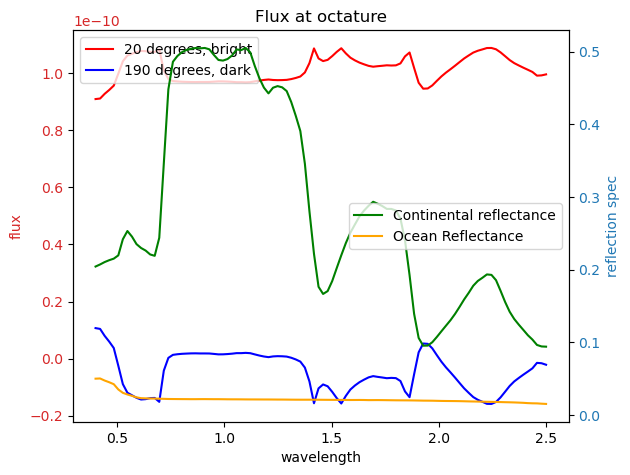

In [ ]:
theta_bright = 20
theta_dark = 190

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('wavelength')
ax1.set_ylabel('flux', color=color)
ax1.plot(wav, flux_cres[int(theta_bright/360*1000)], label=f'{theta_bright} degrees, bright', color= 'red')
ax1.plot(wav, flux_cres[int(theta_dark/360*1000)], label=f'{theta_dark} degrees, dark', color= 'blue')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc = 'upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('reflection spec', color=color)  # we already handled the x-label with ax1
ax2.plot(spectra['cont'][:,0], spectra['cont'][:,1], label='Continental reflectance', color='green')
ax2.plot(spectra['sea'][:,0], spectra['sea'][:,1], label='Ocean Reflectance', color='orange')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc = 'right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Flux at octature')
plt.show()

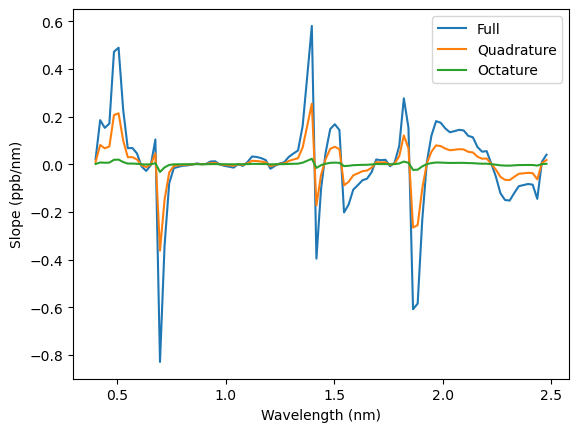

In [ ]:
slope_full = np.diff(flux_full*10E9, axis = 1)
slope_quad = np.diff(flux_quad*10E9, axis = 1)
slope_cres = np.diff(flux_cres*10E9, axis = 1)

plt.plot(wav[:-1], slope_full[0], label = 'Full')
plt.plot(wav[:-1], slope_quad[0], label = 'Quadrature')
plt.plot(wav[:-1], slope_cres[0], label = 'Octature')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Slope (ppb/nm)')
plt.legend()


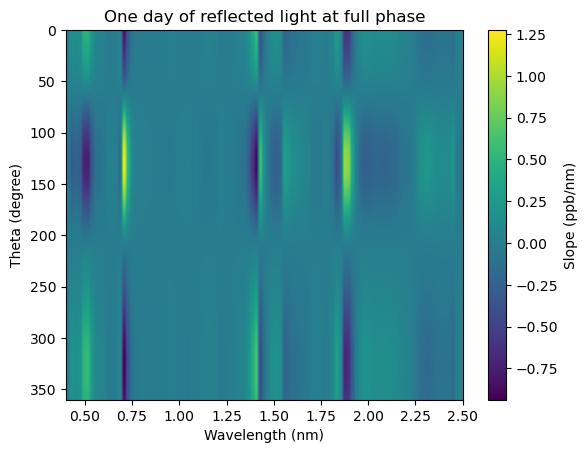

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots()

# Use the "viridis" colormap for flux
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=np.min(slope_full), vmax=np.max(slope_full))

# Plot the flux as an image with color mapping
im = ax.imshow(slope_full, cmap=cmap, norm=norm, aspect='auto',
               extent=(wav[0], wav[-1], theta[-1], theta[0]))

# Add a color bar to show the mapping
cbar = ax.figure.colorbar(im, ax=ax)

# Add labels and titles
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Theta (degree)')
cbar.ax.set_ylabel('Slope (ppb/nm)')
ax.set_title('One day of reflected light at full phase')

# Show the plot
plt.show()

In [ ]:
flux_full_mean = np.mean(flux_full, axis = 0)
plt.plot(forest_wav, flux_full_mean*10E9)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (ppb)')
plt.title('Mean flux at full phase')
plt.show()

NameError: name 'forest_wav' is not defined

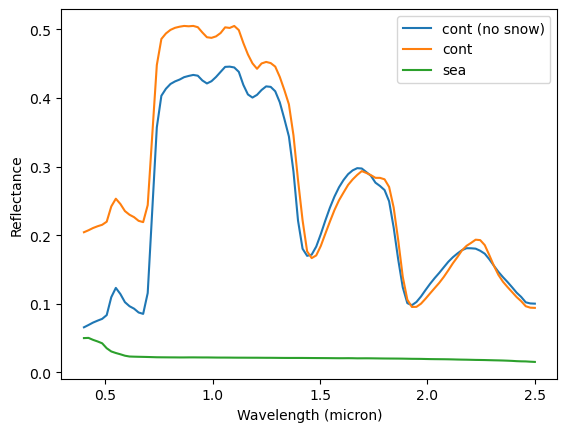

In [ ]:
cont_warm =  (0.3 * spectra['grass'][:,1] + 
        0.3 * spectra['trees'][:,1] +
        0.09 * spectra['granite'][:,1] + 
        0.09 * spectra['basalt'][:,1] +
        0.07 * spectra['sand'][:,1])/0.85
spectra['cont_warm'] = np.column_stack((wav, cont_warm))

plt.plot(spectra['cont_warm'][:,0], spectra['cont_warm'][:,1], label='cont (no snow)')
plt.plot(spectra['cont'][:,0], spectra['cont'][:,1], label='cont')
plt.plot(spectra['sea'][:,0], spectra['sea'][:,1], label='sea')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Reflectance')
plt.legend()
plt.show()

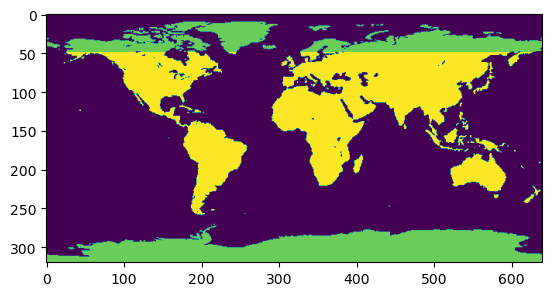

In [ ]:
earth_refl_spec = np.ones((len(wav), 320, 640))


for wl in range(len(wav)):
    image = plt.imread('/Users/andrew/Documents/starry/starry/img/earth.png')

    #iterate over the rows of the image, making each pixel 1 or 0 depending on whether it is land or sea, unless the row is greater than 280, in which case it is ice
    for i in range(len(image)):
        if i < 50:
            image[i][image[i] < 0.5] = spectra['sea'][wl, 1]
            image[i][image[i] >= 0.5] = spectra['snow'][wl, 1]
        elif i > 270:
            image[i][image[i] < 0.5] = spectra['sea'][wl, 1]
            image[i][image[i] >= 0.5] = spectra['snow'][wl, 1]
        else:
            image[i][image[i] < 0.5] = spectra['sea'][wl, 1]
            image[i][image[i] >= 0.5] = spectra['cont_warm'][wl, 1]
    
    earth_refl_spec[wl] = image

plt.imshow(earth_refl_spec[50])

In [ ]:
ydeg = 15
specmap_y = np.zeros((len(wav), (ydeg+1)**2))

for wl in range(len(wav)):
    map = starry.Map(ydeg=ydeg, reflected=True)
    map.load(np.flipud(earth_refl_spec[wl]))
    specmap_y[wl] = map.y

In [ ]:
specmap = starry.Map(ydeg=ydeg, reflected=True, nw = len(wav))

for wl in range(len(wav)):
    c = 0
    l = 1
    while l <= ydeg:
        m = -l
        while m <= l:
            specmap[l,m,wl] = specmap_y[wl][c]
            m += 1
            c += 1
        l += 1

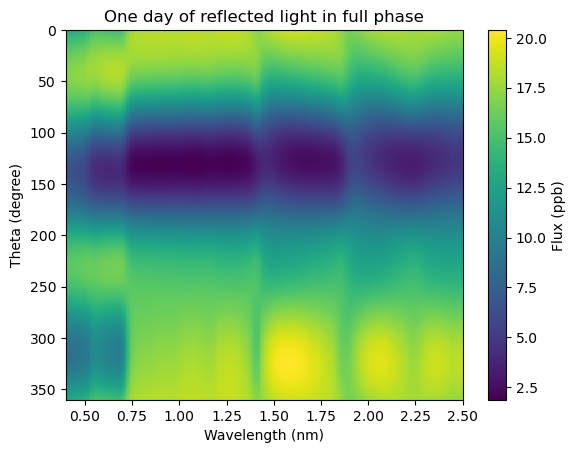

In [ ]:
theta = np.linspace(0, 360, 1000)
flux_full = specmap.flux(theta = theta, xs = 0, ys = 0, zs = r, normalize = False)

#make a color map plot with forest.wav on the x axis and theta on the y axis, with flux as the color

# Create a figure and axes
fig, ax = plt.subplots()

# Use the "viridis" colormap for flux
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=np.min(flux_full*10E9), vmax=np.max(flux_full*10E9))

# Plot the flux as an image with color mapping
im = ax.imshow(flux_full*10E9, cmap=cmap, norm=norm, aspect='auto',
               extent=(wav[0], wav[-1], theta[-1], theta[0]))

# Add a color bar to show the mapping
cbar = ax.figure.colorbar(im, ax=ax)

# Add labels and titles
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Theta (degree)')
cbar.ax.set_ylabel('Flux (ppb)')
ax.set_title('One day of reflected light in full phase')

# Show the plot
plt.show()



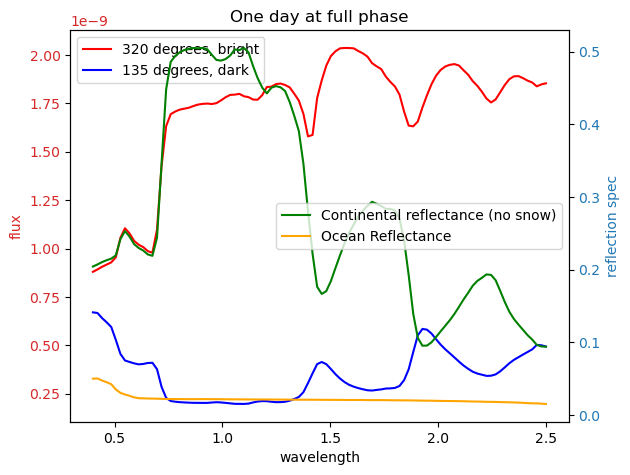

In [ ]:
theta_bright = 320
theta_dark = 135

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('wavelength')
ax1.set_ylabel('flux', color=color)
ax1.plot(wav, flux_full[int(theta_bright/360*1000)], label=f'{theta_bright} degrees, bright', color= 'red')
ax1.plot(wav, flux_full[int(theta_dark/360*1000)], label=f'{theta_dark} degrees, dark', color= 'blue')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc = 'upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('reflection spec', color=color)  # we already handled the x-label with ax1
ax2.plot(spectra['cont_warm'][:,0], spectra['cont'][:,1], label='Continental reflectance (no snow)', color='green')
ax2.plot(spectra['sea'][:,0], spectra['sea'][:,1], label='Ocean Reflectance', color='orange')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc = 'right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('One day at full phase')
plt.show()

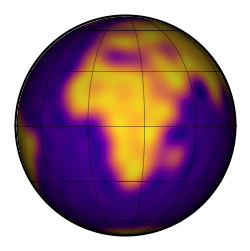

In [ ]:
map.show(theta=340, xs=0, ys=0, zs=r)

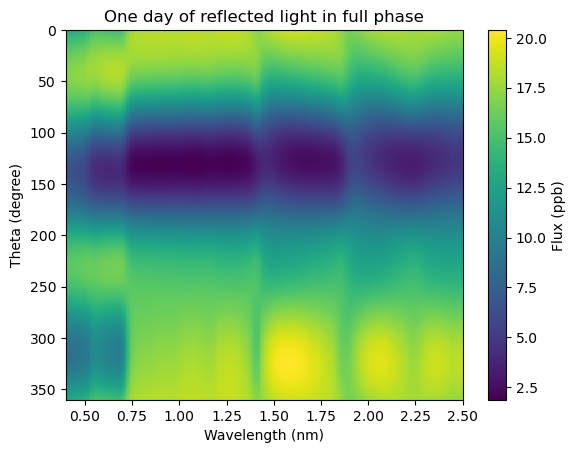

In [ ]:
theta = np.linspace(0, 360, 1000)
specmap.obl = 23.5
flux_full = specmap.flux(theta = theta, xs = 0, ys = 0, zs = r, normalize = False)

#make a color map plot with forest.wav on the x axis and theta on the y axis, with flux as the color

# Create a figure and axes
fig, ax = plt.subplots()

# Use the "viridis" colormap for flux
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=np.min(flux_full*10E9), vmax=np.max(flux_full*10E9))

# Plot the flux as an image with color mapping
im = ax.imshow(flux_full*10E9, cmap=cmap, norm=norm, aspect='auto',
               extent=(wav[0], wav[-1], theta[-1], theta[0]))

# Add a color bar to show the mapping
cbar = ax.figure.colorbar(im, ax=ax)

# Add labels and titles
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Theta (degree)')
cbar.ax.set_ylabel('Flux (ppb)')
ax.set_title('One day of reflected light in full phase')

# Show the plot
plt.show()

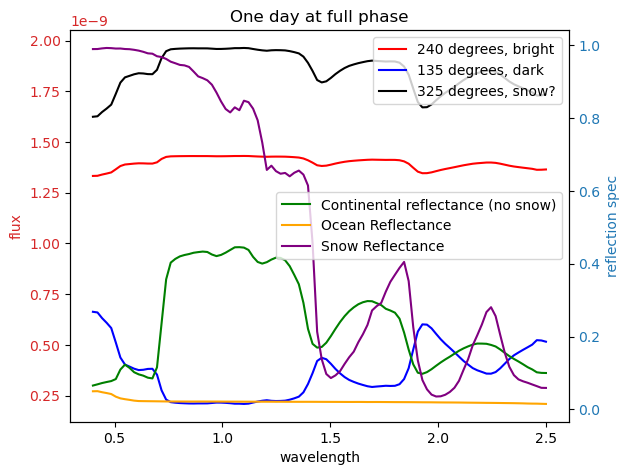

In [ ]:
theta_bright = 240
theta_dark = 135
theta_ice = 325

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('wavelength')
ax1.set_ylabel('flux', color=color)
ax1.plot(wav, flux_full[int(theta_bright/360*1000)], label=f'{theta_bright} degrees, bright', color= 'red')
ax1.plot(wav, flux_full[int(theta_dark/360*1000)], label=f'{theta_dark} degrees, dark', color= 'blue')
ax1.plot(wav, flux_full[int(theta_ice/360*1000)], label=f'{theta_ice} degrees, snow?', color= 'black')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc = 'upper right')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('reflection spec', color=color)  # we already handled the x-label with ax1
ax2.plot(spectra['cont_warm'][:,0], spectra['cont_warm'][:,1], label='Continental reflectance (no snow)', color='green')
ax2.plot(spectra['sea'][:,0], spectra['sea'][:,1], label='Ocean Reflectance', color='orange')
ax2.plot(spectra['snow'][:,0], spectra['snow'][:,1], label='Snow Reflectance', color='purple')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc = 'right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('One day at full phase')
plt.show()

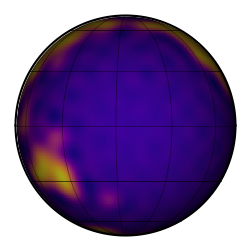

In [ ]:
map.show(theta=175, xs=0, ys=0, zs=r)

In [ ]:
R_k = 6371.
a_k = 159E6
P_k = 381
dist_k = 1.30197
R_pk =  695508

int_flux, int_flux_noise, flux, obs_phase, theta, obs_time, t_obs = earth_refl_spec_obs(
    specmap,
    scalarmap, 
    num_obs = 150, 
    num_nights = 5, 
    cadence = 15., 
    texp = 15., 
    phase_init = 20., 
    theta_init = 320., 
    snr = 5.,
    Rp = R_k,
    a = a_k,
    porb = P_k,
    prot = P_k,
    dist = dist_k
    )


NameError: name 'earth_refl_spec_obs' is not defined